In [1]:
#bibliothèque 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("chargement OK")

chargement OK


In [2]:
#bibliothèque machine learning
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
print("chargement OK")

chargement OK


In [3]:
#chargement des données 
train_file_path = ("C:/Users/Patrick Menan/Desktop/TP1/Zindy/prediction_qualite_air/data/Train.csv")
test_file_path = ("C:/Users/Patrick Menan/Desktop/TP1/Zindy/prediction_qualite_air/data/Test.csv")
train_data_set = pd.read_csv(train_file_path)
test_data_set = pd.read_csv(test_file_path)
print("chargement OK")

chargement OK


# Exploration des données 

## Analyse de la forme

In [6]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 100)
df = train_data_set.copy()
df.head()

Place_ID X Date        Date Place_ID  target  target_min  target_max  \
0  010Q650 X 2020-01-02  2020-01-02  010Q650    38.0        23.0        53.0   
1  010Q650 X 2020-01-03  2020-01-03  010Q650    39.0        25.0        63.0   
2  010Q650 X 2020-01-04  2020-01-04  010Q650    24.0         8.0        56.0   
3  010Q650 X 2020-01-05  2020-01-05  010Q650    49.0        10.0        55.0   
4  010Q650 X 2020-01-06  2020-01-06  010Q650    21.0         9.0        52.0   

   target_variance  target_count  precipitable_water_entire_atmosphere  \
0           769.50            92                             11.000000   
1          1319.85            91                             14.600000   
2          1181.96            96                             16.400000   
3          1113.67            96                              6.911948   
4          1164.82            95                             13.900001   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                          60.200001                            0.00804   
1                          48.799999                            0.00839   
2                          33.400002                            0.00750   
3                          21.300001                            0.00391   
4                          44.700001                            0.00535   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                    18.516840                              1.996377   
1                    22.546533                              3.330430   
2                    27.031030                              5.065727   
3                    23.971857                              3.004001   
4                    16.816309                              2.621787   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                             -1.227395                          0.000074   
1                             -1.188108                          0.000076   
2                              3.500559                          0.000067   
3                              1.099468                          0.000083   
4                              2.670559                          0.000070   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index  \
0                                0.000156                       -1.231330   
1                                0.000197                       -1.082553   
2                                0.000170                       -1.001242   
3                                0.000175                       -0.777019   
4                                0.000142                        0.366323   

   L3_NO2_cloud_fraction  L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0               0.006507           840209.874619                    76.537512   
1               0.018360           840772.941995                   -14.708036   
2               0.015904           841410.713456                  -105.201338   
3               0.055765           841103.242368                  -104.334056   
4               0.028530           840763.055499                    58.850179   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                   38.634284                  -61.736719   
1                   59.624912                  -67.693509   
2                   49.839714                  -78.342701   
3                   29.180977                  -73.896572   
4                    0.797294                  -68.612480   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                  22.358167                                        0.000057   
1                  28.614804                                        0.000055   
2                  34.296977                                        0.000059   
3                  30.545393                                        0.000060   
4                 

### La variable cible

In [ ]:
#c'est la variable target

### Nombre de ligne et de colonne de notre jeu de données 

In [8]:
df.shape

(30557, 82)

### les différents types de variables de notre data set

In [11]:
df.dtypes

Place_ID X Date                                         object
Date                                                    object
Place_ID                                                object
target                                                 float64
target_min                                             float64
target_max                                             float64
target_variance                                        float64
target_count                                             int64
precipitable_water_entire_atmosphere                   float64
relative_humidity_2m_above_ground                      float64
specific_humidity_2m_above_ground                      float64
temperature_2m_above_ground                            float64
u_component_of_wind_10m_above_ground                   float64
v_component_of_wind_10m_above_ground                   float64
L3_NO2_NO2_column_number_density                       float64
L3_NO2_NO2_slant_column_number_density                 

In [13]:
#en resumé
#il donc 78 variables de types float64, 3 du type objet et 1 de type int64
df.dtypes.value_counts()

float64    78
object      3
int64       1
dtype: int64

### Analyse des valeurs manquantes

In [16]:
#jeu de données avec True si valeur manquante et False sinon
df.isna()

Place_ID X Date   Date  Place_ID  target  target_min  target_max  \
0                False  False     False   False       False       False   
1                False  False     False   False       False       False   
2                False  False     False   False       False       False   
3                False  False     False   False       False       False   
4                False  False     False   False       False       False   
...                ...    ...       ...     ...         ...         ...   
30552            False  False     False   False       False       False   
30553            False  False     False   False       False       False   
30554            False  False     False   False       False       False   
30555            False  False     False   False       False       False   
30556            False  False     False   False       False       False   

       target_variance  target_count  precipitable_water_entire_atmosphere  \
0                False         False                                 False   
1                False         False                                 False   
2                False         False                                 False   
3                False         False                                 False   
4                False         False                                 False   
...                ...           ...                                   ...   
30552            False         False                                 False   
30553            False         False                                 False   
30554            False         False                                 False   
30555            False         False                                 False   
30556            False         False                                 False   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                                  False                              False   
1                                  False                              False   
2                                  False                              False   
3                                  False                              False   
4                                  False                              False   
...                                  ...                                ...   
30552                              False                              False   
30553                              False                              False   
30554                              False                              False   
30555                              False                              False   
30556                              False                              False   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                            False                                 False   
1                            False                                 False   
2                            False                                 False   
3                            False                                 False   
4                            False                                 False   
...                            ...                                   ...   
30552                        False                                 False   
30553                        False                                 False   
30554                        False                                 False   
30555                        False                                 False   
30556                        False                                 False   

       v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                                     False                             False   
1                                     False                             False   
2                                     False                     

In [17]:
#somme des valeurs manquantes pour chaque colonne 
df.isna().sum()

Place_ID X Date                                            0
Date                                                       0
Place_ID                                                   0
target                                                     0
target_min                                                 0
target_max                                                 0
target_variance                                            0
target_count                                               0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        2189
L3_NO2_NO2_slant_column_number_density                  2189
L3_NO2_absorbing_aerosol

In [19]:
#pourcentage de valeurs manquantes dans chaque colonne 
(df.isna().sum()/df.shape[0]).sort_values()

Place_ID X Date                                        0.000000
v_component_of_wind_10m_above_ground                   0.000000
u_component_of_wind_10m_above_ground                   0.000000
temperature_2m_above_ground                            0.000000
specific_humidity_2m_above_ground                      0.000000
relative_humidity_2m_above_ground                      0.000000
target_count                                           0.000000
precipitable_water_entire_atmosphere                   0.000000
target_max                                             0.000000
target_min                                             0.000000
target                                                 0.000000
Place_ID                                               0.000000
Date                                                   0.000000
target_variance                                        0.000000
L3_AER_AI_sensor_altitude                              0.006447
L3_AER_AI_solar_azimuth_angle           

Text(0.5, 1.0, 'Représentation avec carte thermique des valeurs manquantes')

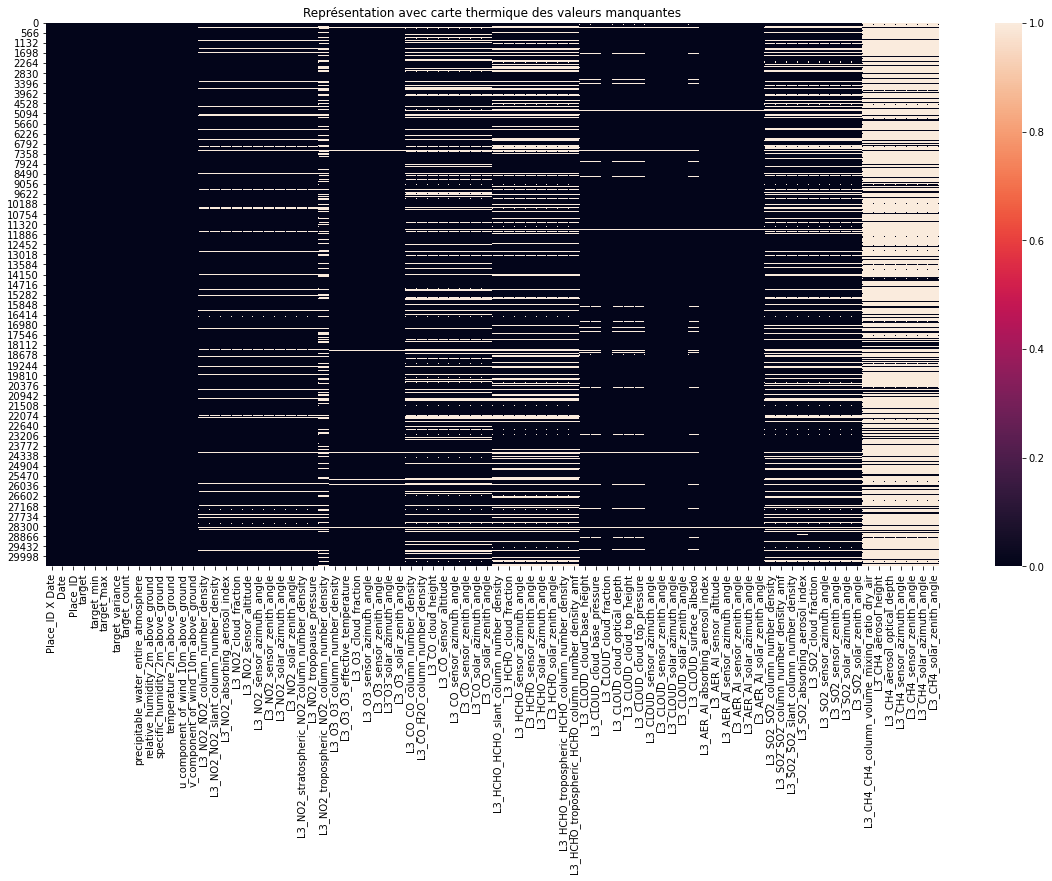

In [20]:
#représentation des valeurs manquantes avec carte thermique
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(data = df.isna())
plt.title("Représentation avec carte thermique des valeurs manquantes")

##  Analyse de fond

### 1- Suppression des variables avec plus de 80% de valeurs manquantes

In [21]:
#gardera uniquement les variables avec moins de 80% de valeur manquantes
# c'est dire les valeurs à True
df.isna().sum()/df.shape[0] < 0.8

Place_ID X Date                                         True
Date                                                    True
Place_ID                                                True
target                                                  True
target_min                                              True
target_max                                              True
target_variance                                         True
target_count                                            True
precipitable_water_entire_atmosphere                    True
relative_humidity_2m_above_ground                       True
specific_humidity_2m_above_ground                       True
temperature_2m_above_ground                             True
u_component_of_wind_10m_above_ground                    True
v_component_of_wind_10m_above_ground                    True
L3_NO2_NO2_column_number_density                        True
L3_NO2_NO2_slant_column_number_density                  True
L3_NO2_absorbing_aerosol

In [24]:
#creation du nouveau df avec les colonnes à True
df.columns[df.isna().sum()/df.shape[0] < 0.8]

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

In [26]:
#nouveau df 
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.8]]

In [27]:
df.head()

Place_ID X Date        Date Place_ID  target  target_min  target_max  \
0  010Q650 X 2020-01-02  2020-01-02  010Q650    38.0        23.0        53.0   
1  010Q650 X 2020-01-03  2020-01-03  010Q650    39.0        25.0        63.0   
2  010Q650 X 2020-01-04  2020-01-04  010Q650    24.0         8.0        56.0   
3  010Q650 X 2020-01-05  2020-01-05  010Q650    49.0        10.0        55.0   
4  010Q650 X 2020-01-06  2020-01-06  010Q650    21.0         9.0        52.0   

   target_variance  target_count  precipitable_water_entire_atmosphere  \
0           769.50            92                             11.000000   
1          1319.85            91                             14.600000   
2          1181.96            96                             16.400000   
3          1113.67            96                              6.911948   
4          1164.82            95                             13.900001   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                          60.200001                            0.00804   
1                          48.799999                            0.00839   
2                          33.400002                            0.00750   
3                          21.300001                            0.00391   
4                          44.700001                            0.00535   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                    18.516840                              1.996377   
1                    22.546533                              3.330430   
2                    27.031030                              5.065727   
3                    23.971857                              3.004001   
4                    16.816309                              2.621787   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                             -1.227395                          0.000074   
1                             -1.188108                          0.000076   
2                              3.500559                          0.000067   
3                              1.099468                          0.000083   
4                              2.670559                          0.000070   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index  \
0                                0.000156                       -1.231330   
1                                0.000197                       -1.082553   
2                                0.000170                       -1.001242   
3                                0.000175                       -0.777019   
4                                0.000142                        0.366323   

   L3_NO2_cloud_fraction  L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0               0.006507           840209.874619                    76.537512   
1               0.018360           840772.941995                   -14.708036   
2               0.015904           841410.713456                  -105.201338   
3               0.055765           841103.242368                  -104.334056   
4               0.028530           840763.055499                    58.850179   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                   38.634284                  -61.736719   
1                   59.624912                  -67.693509   
2                   49.839714                  -78.342701   
3                   29.180977                  -73.896572   
4                    0.797294                  -68.612480   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                  22.358167                                        0.000057   
1                  28.614804                                        0.000055   
2                  34.296977                                        0.000059   
3                  30.545393                                        0.000060   
4                 

In [29]:
#supression des autres colones non essentielles à notre analyse
df = df.drop(['Place_ID X Date', 'Date', 'Place_ID', 'target_min', 'target_max', 'target_variance', 'target_count'], axis=1)
df

target  precipitable_water_entire_atmosphere  \
0        38.0                             11.000000   
1        39.0                             14.600000   
2        24.0                             16.400000   
3        49.0                              6.911948   
4        21.0                             13.900001   
...       ...                                   ...   
30552    22.0                              6.700000   
30553    53.0                              6.300000   
30554    85.0                              7.100000   
30555   103.0                             19.100000   
30556    89.0                             11.600000   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                              60.200001                            0.00804   
1                              48.799999                            0.00839   
2                              33.400002                            0.00750   
3                              21.300001                            0.00391   
4                              44.700001                            0.00535   
...                                  ...                                ...   
30552                          68.300003                            0.00352   
30553                          77.700005                            0.00341   
30554                          68.500000                            0.00356   
30555                          66.300003                            0.00523   
30556                          68.400002                            0.00486   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                        18.516840                              1.996377   
1                        22.546533                              3.330430   
2                        27.031030                              5.065727   
3                        23.971857                              3.004001   
4                        16.816309                              2.621787   
...                            ...                                   ...   
30552                     4.256799                             -4.810586   
30553                     2.067438                             -2.346421   
30554                     4.438623                              0.095703   
30555                    10.573236                              0.434940   
30556                     9.002069                             -0.710093   

       v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                                 -1.227395                          0.000074   
1                                 -1.188108                          0.000076   
2                                  3.500559                          0.000067   
3                                  1.099468                          0.000083   
4                                  2.670559                          0.000070   
...                                     ...                               ...   
30552                             -4.195359                          0.000063   
30553                              0.749136                          0.000072   
30554                              0.141943                          0.000068   
30555                             -1.439778                          0.000086   
30556                              0.887913                          0.000079   

       L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index  \
0                                    0.000156                       -1.231330   
1                                    0.000197                       -1.082553   
2                                    0.000170                       -1.001242   
3                                    0.000175                       -0.777019   
4                                    0.000142                        0.366323   
...                      

### 2- Visualisation de la target

In [33]:
#étapes très importante en cas de prédiction de valeur catégorielles
df.target.value_counts(normalize = True)

25.0     0.038224
21.0     0.035802
17.0     0.033118
30.0     0.031319
34.0     0.027326
           ...   
397.0    0.000033
13.1     0.000033
201.0    0.000033
371.0    0.000033
14.7     0.000033
Name: target, Length: 375, dtype: float64

C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution de la variable taget')

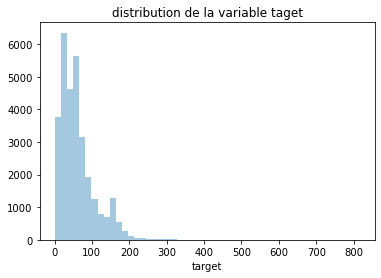

In [39]:
#plt.figure(figsize=(14,6))
sns.distplot(a = df['target'], kde=False)
plt.title("distribution de la variable taget")

### 3- Sigification des variables 

C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Patrick Menan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

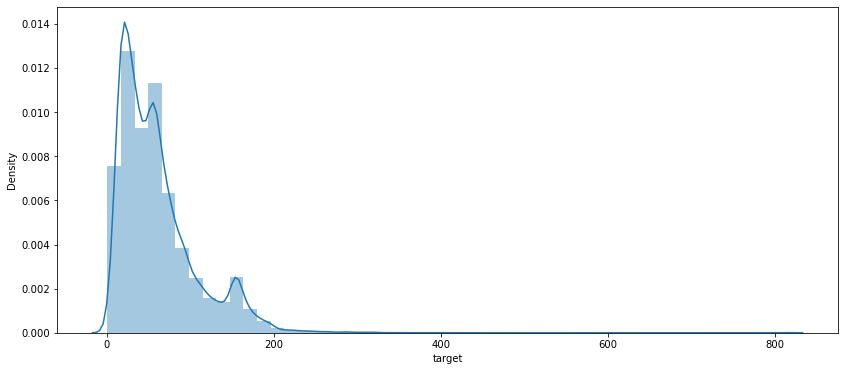

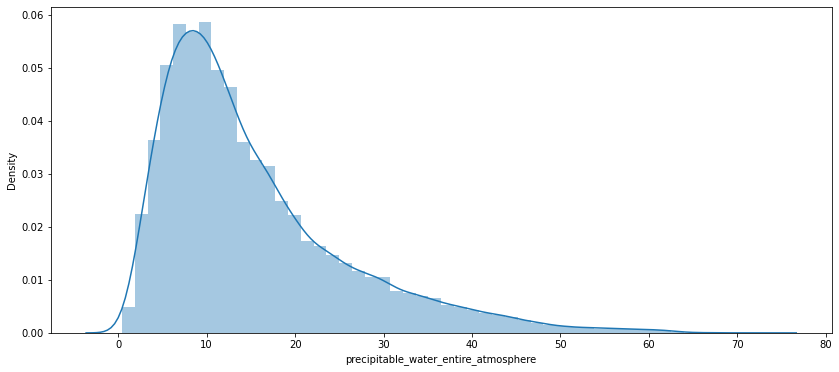

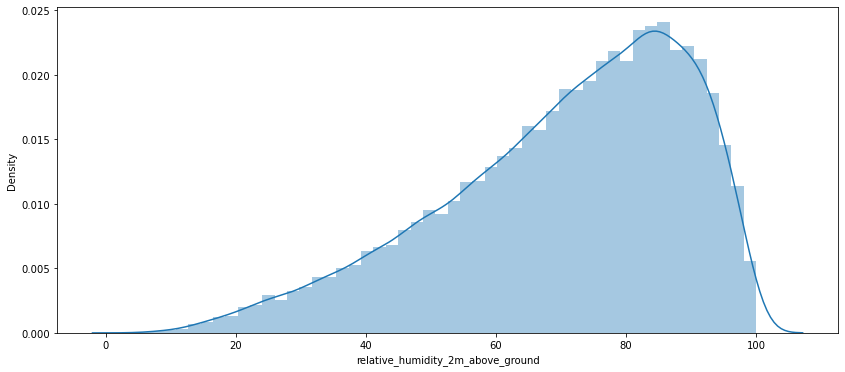

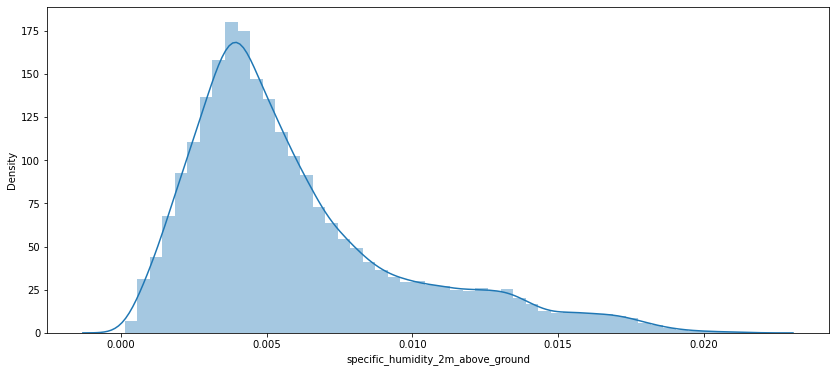

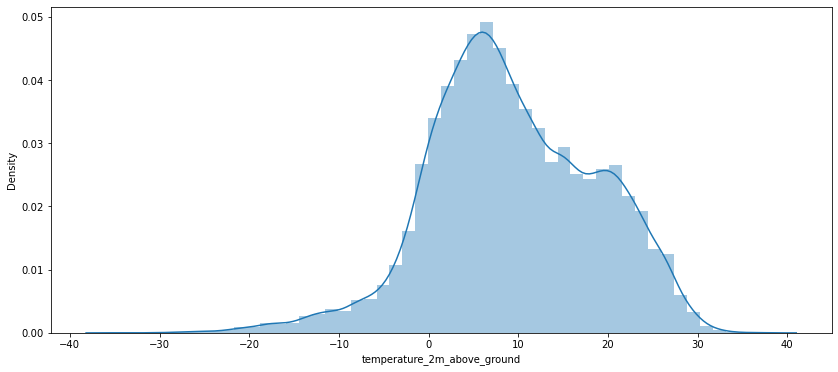

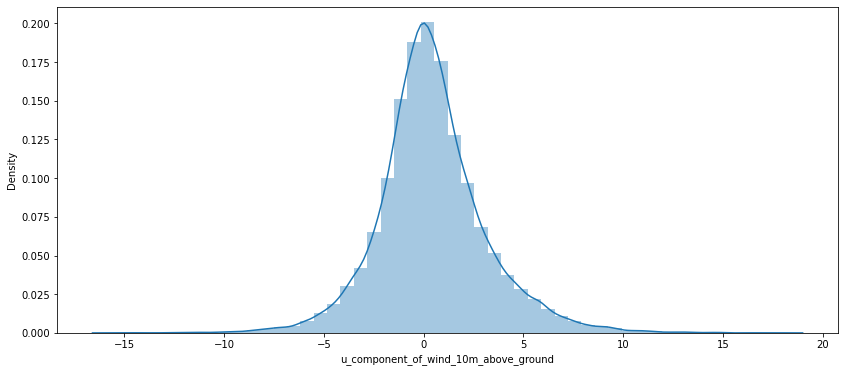

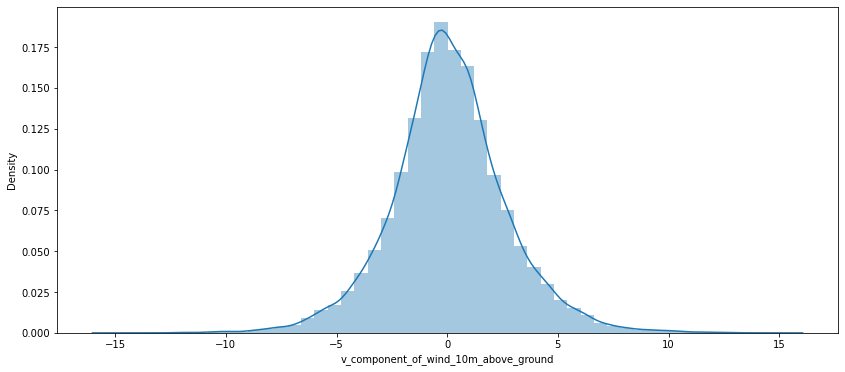

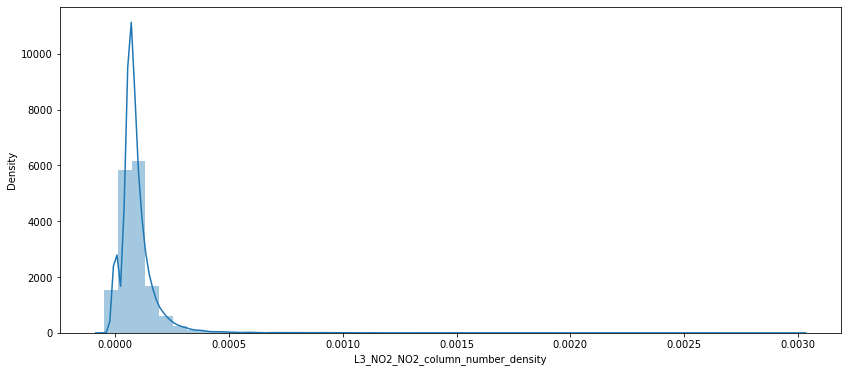

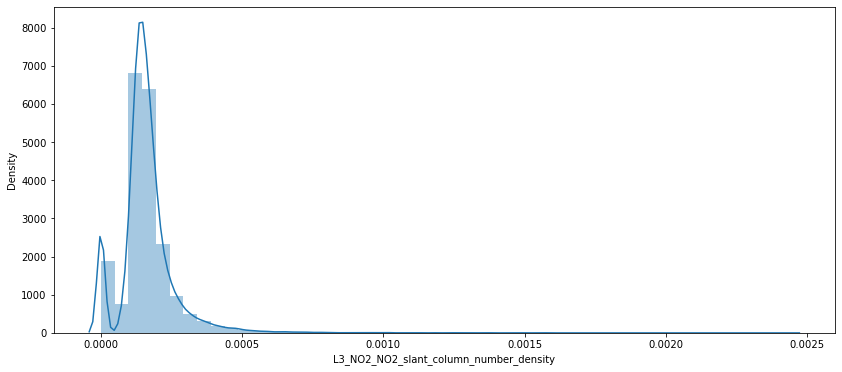

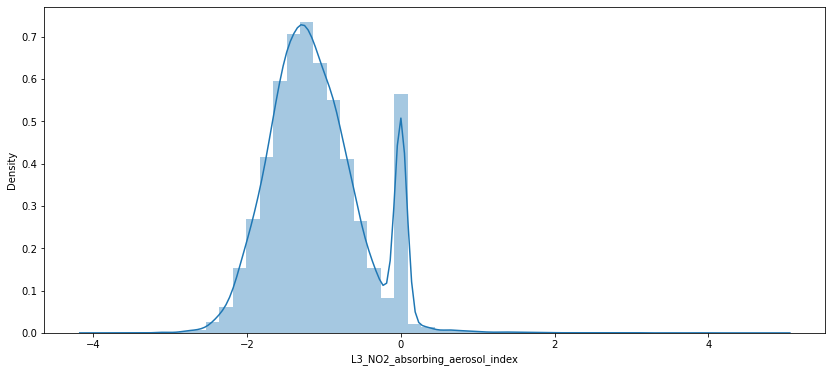

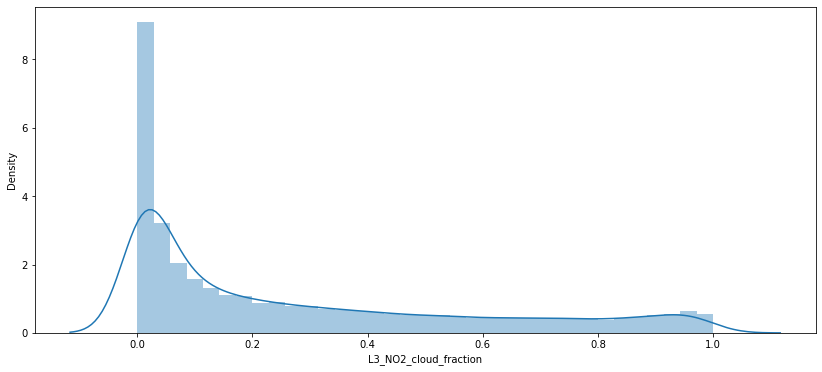

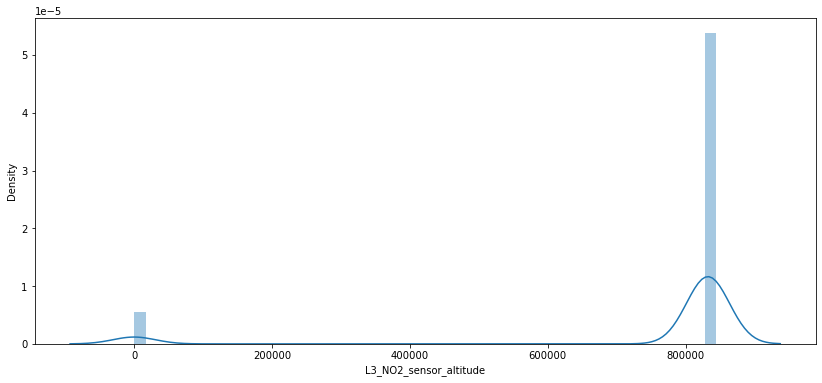

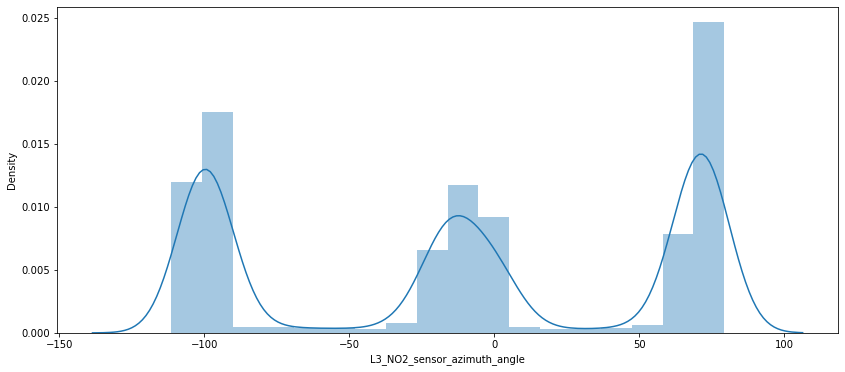

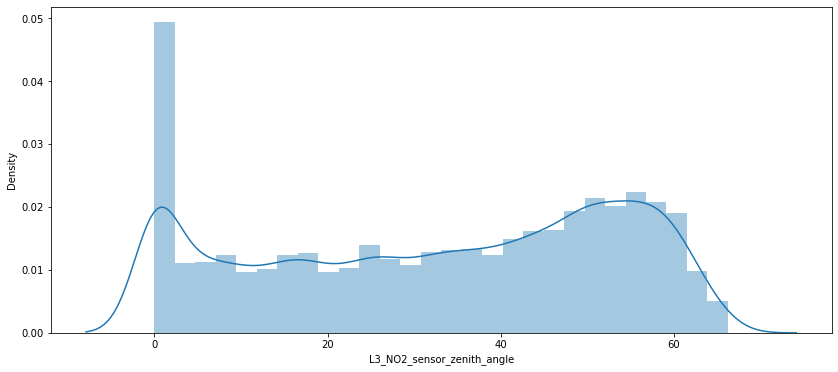

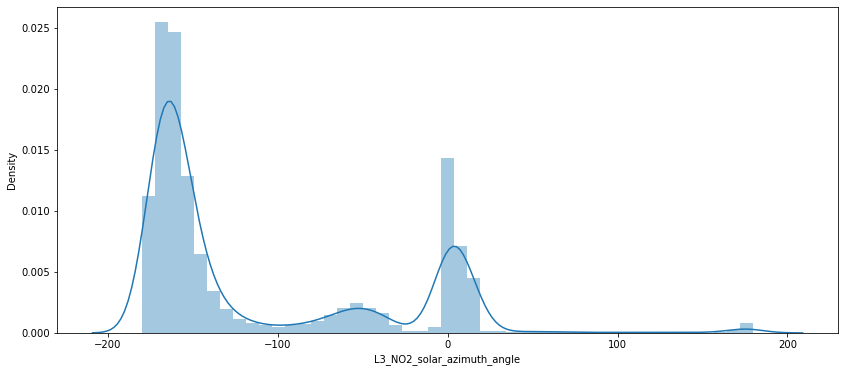

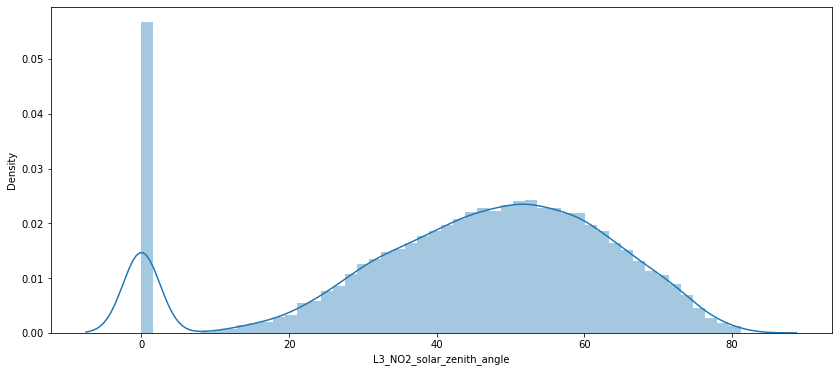

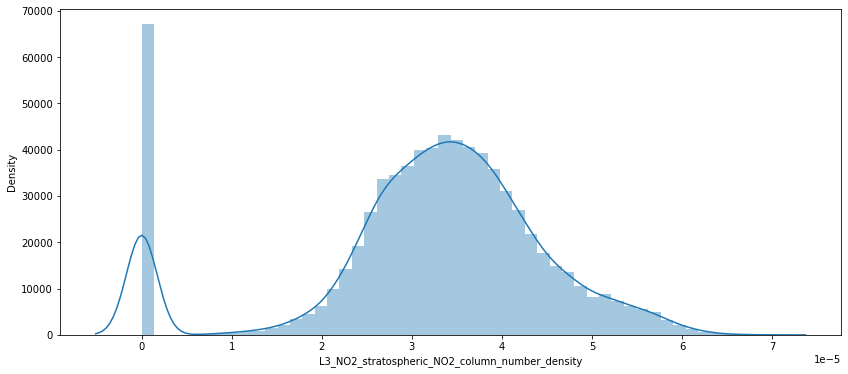

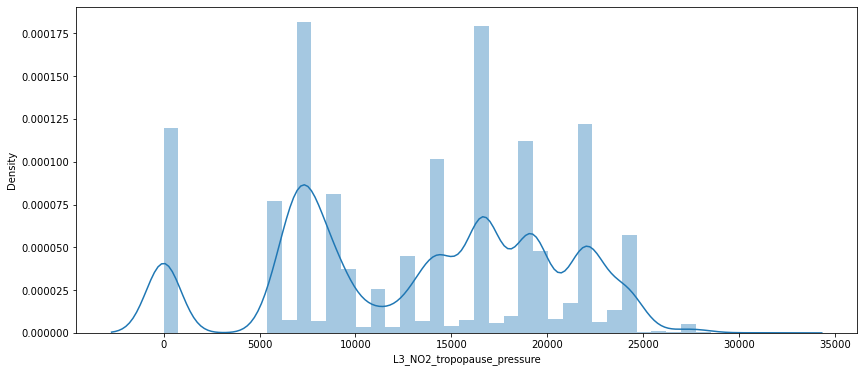

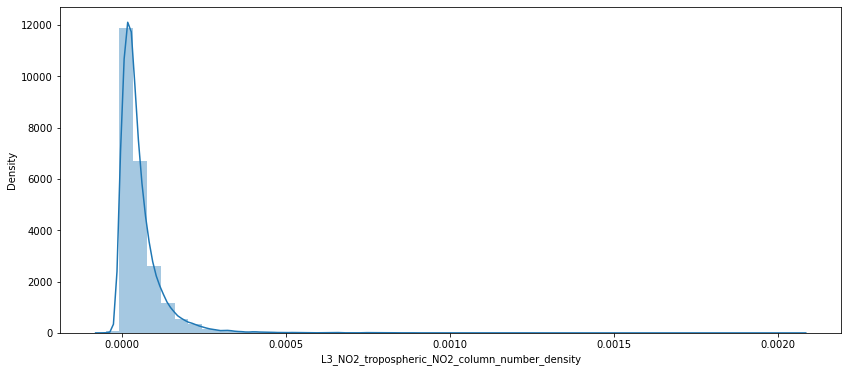

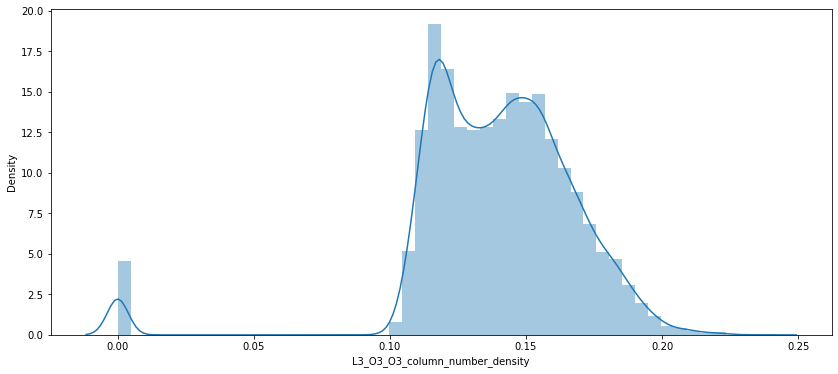

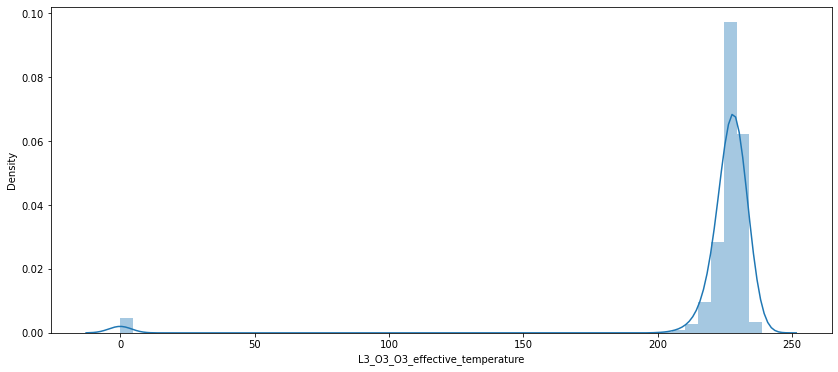

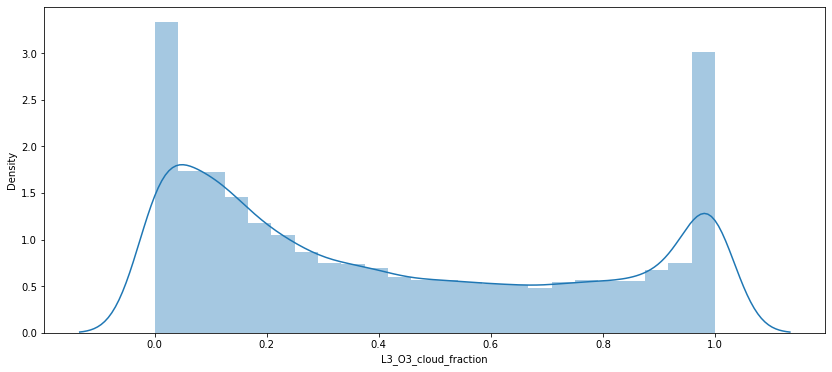

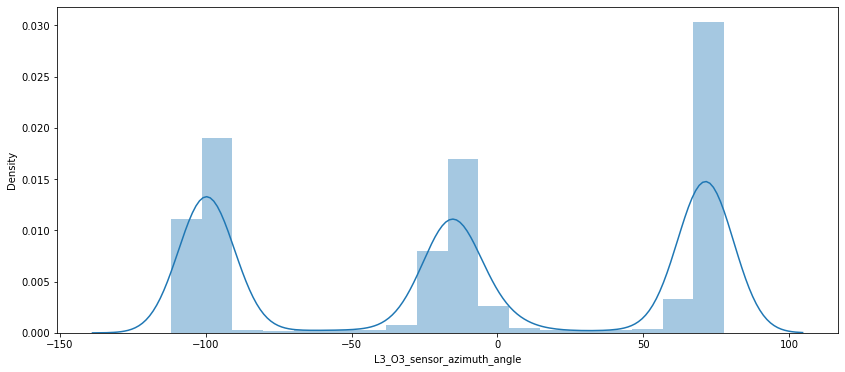

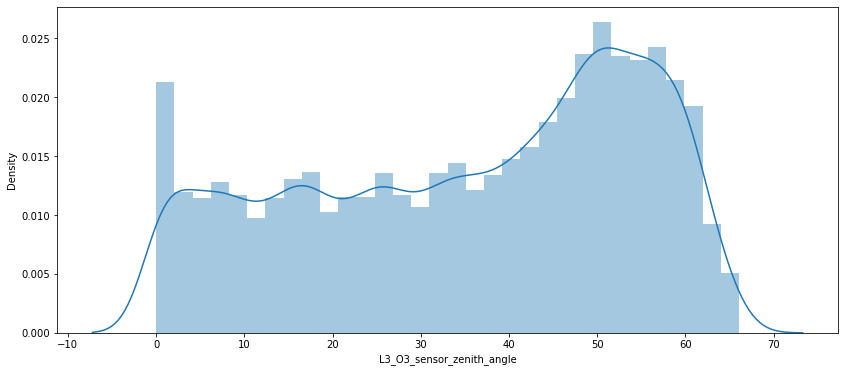

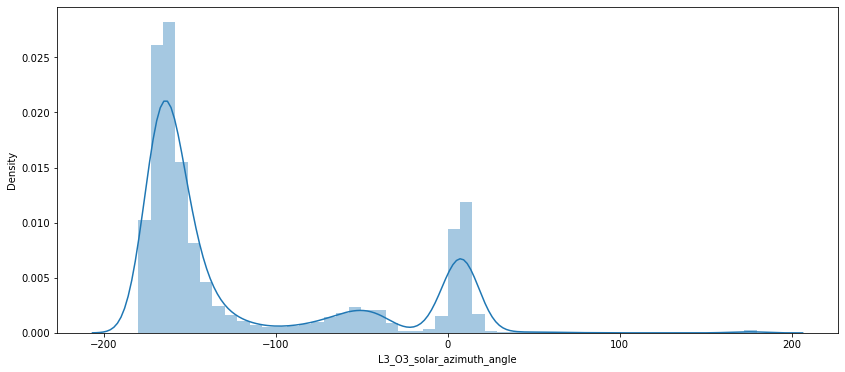

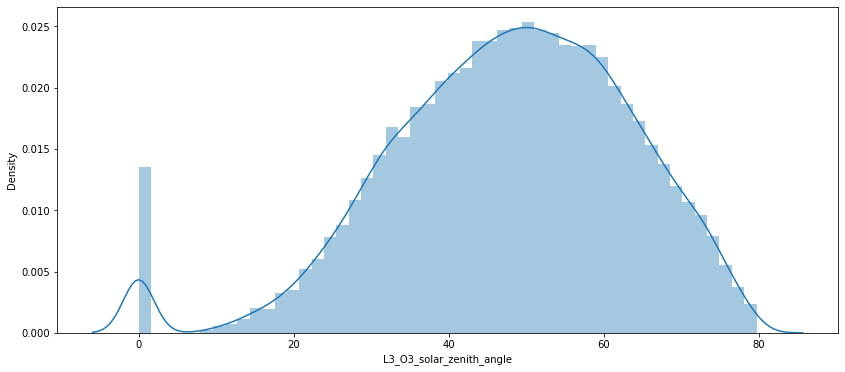

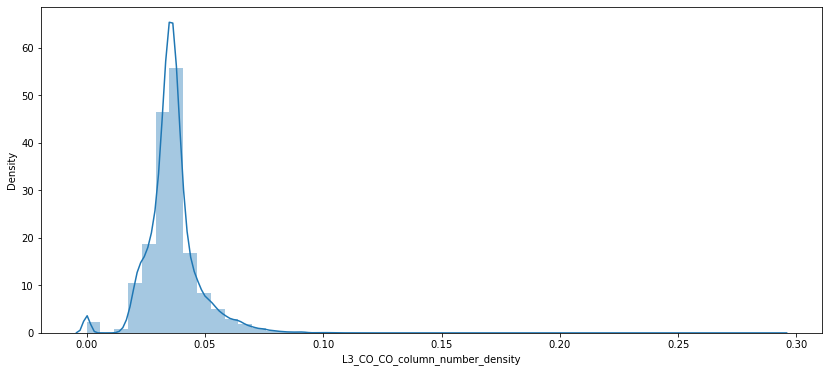

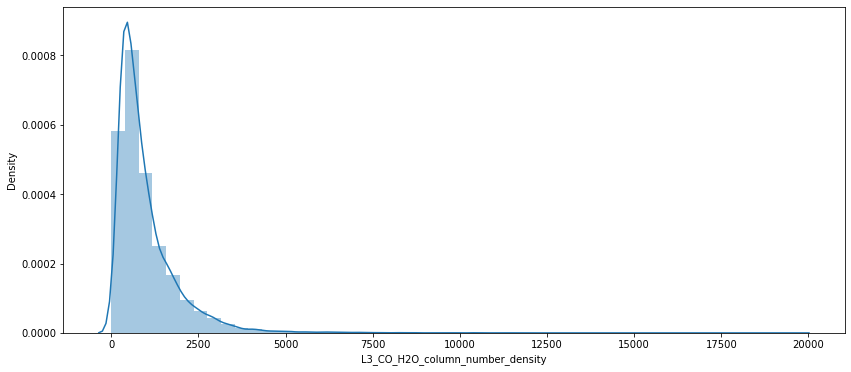

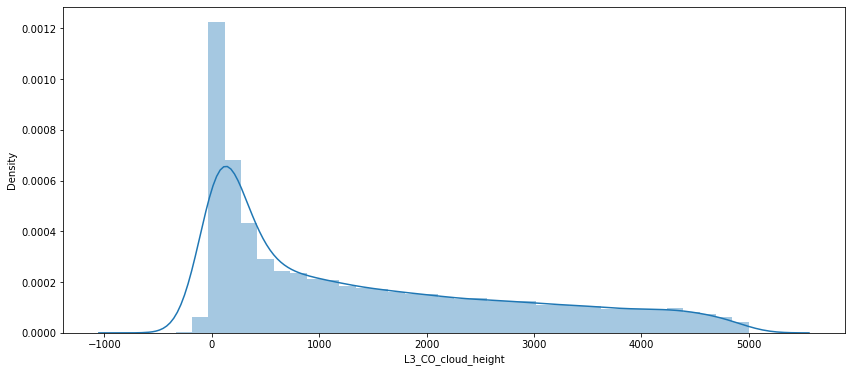

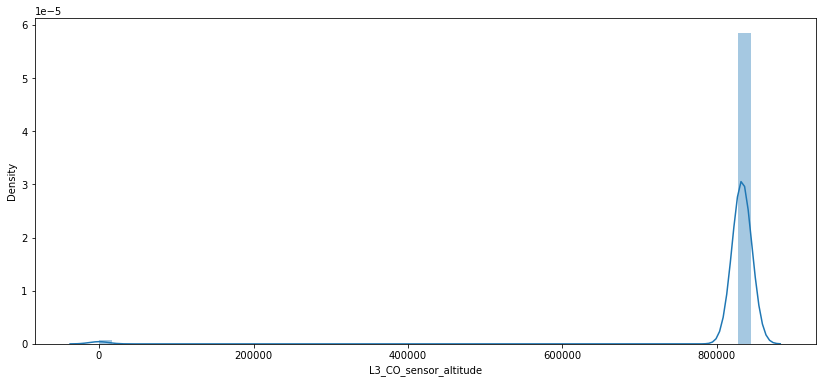

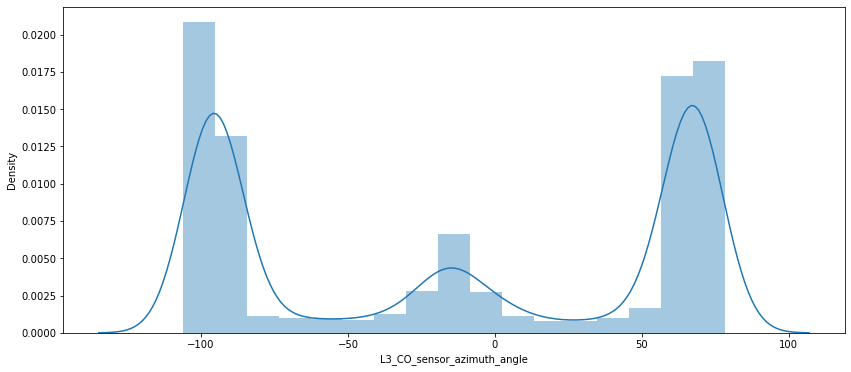

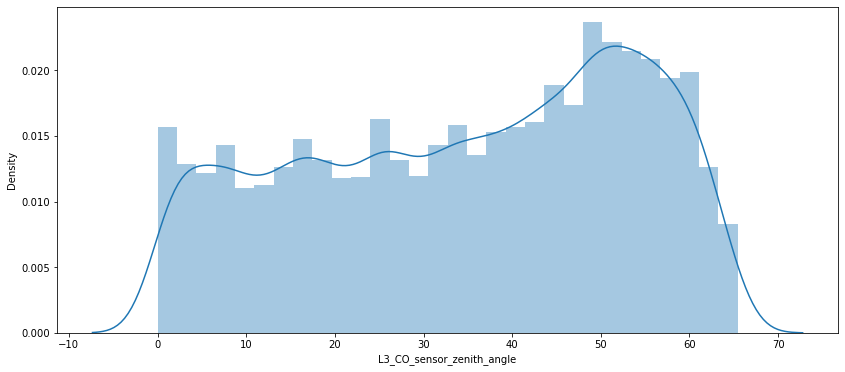

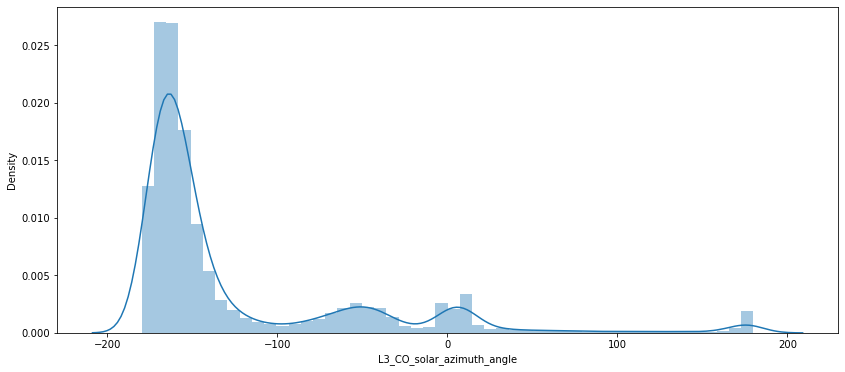

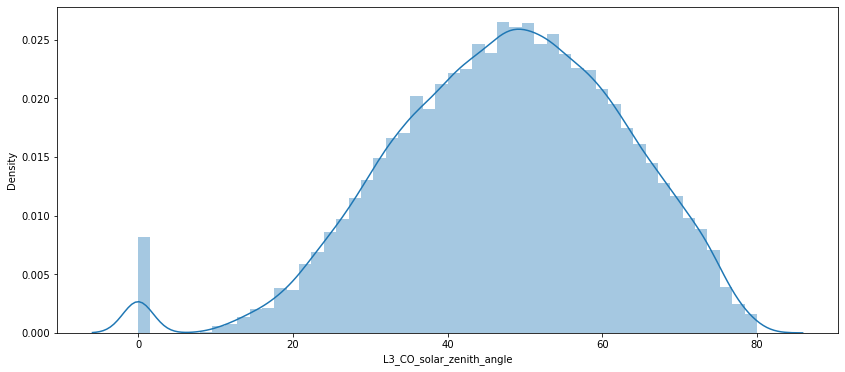

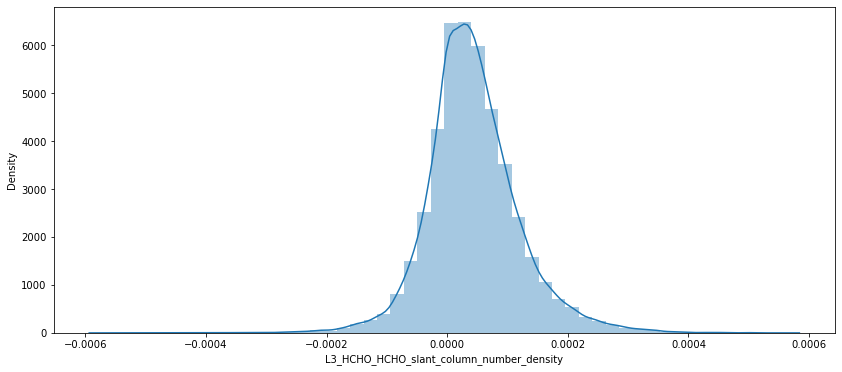

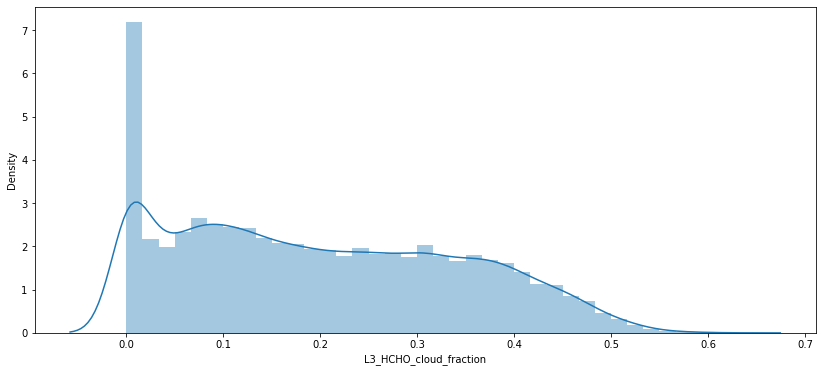

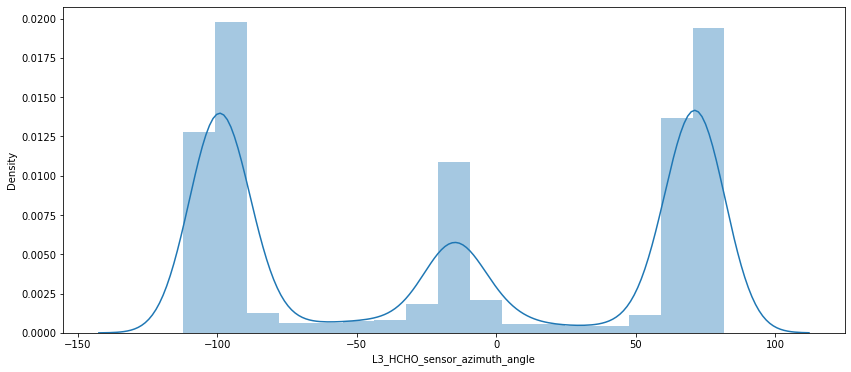

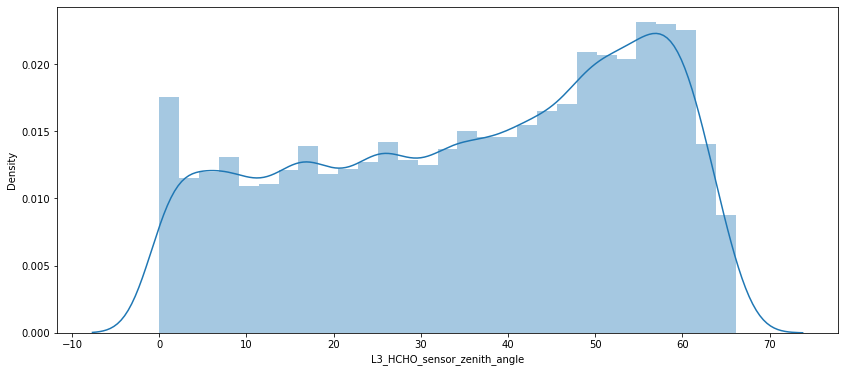

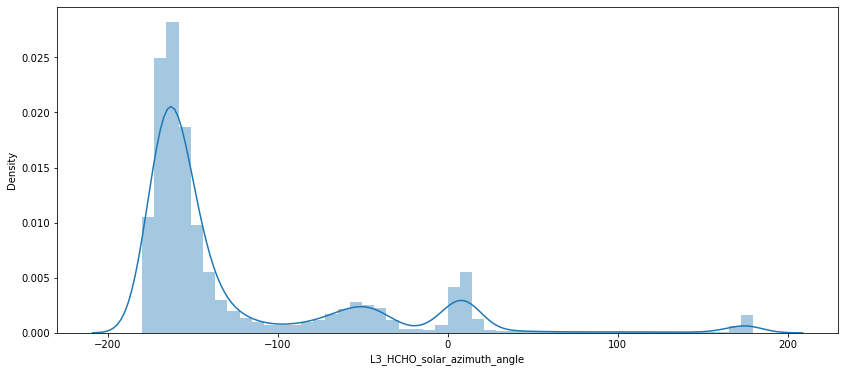

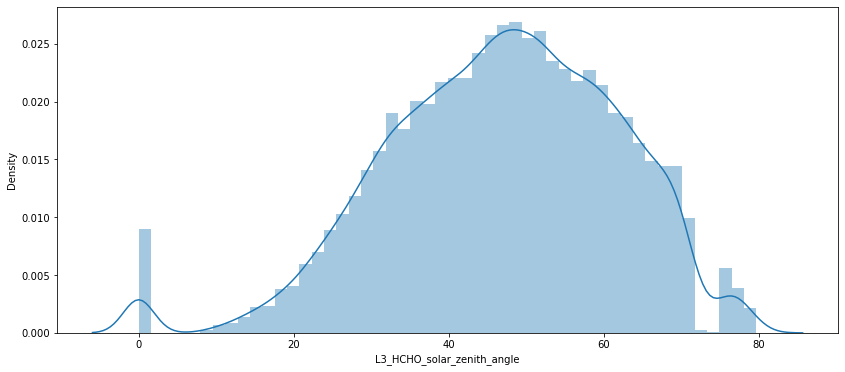

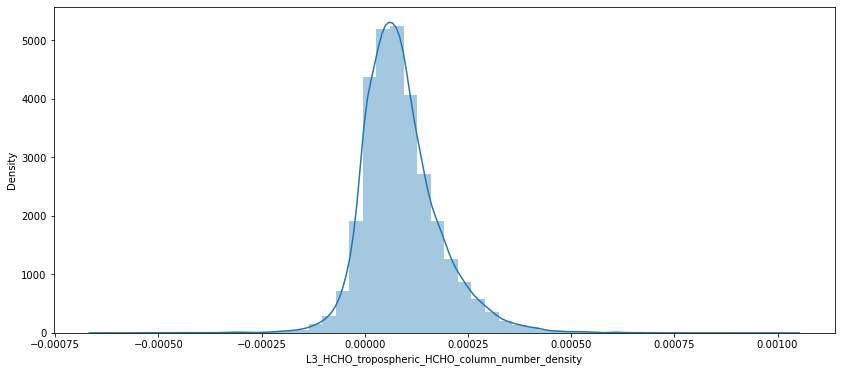

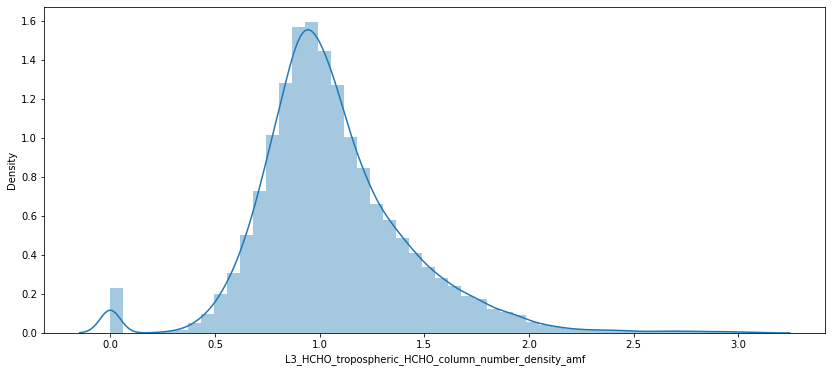

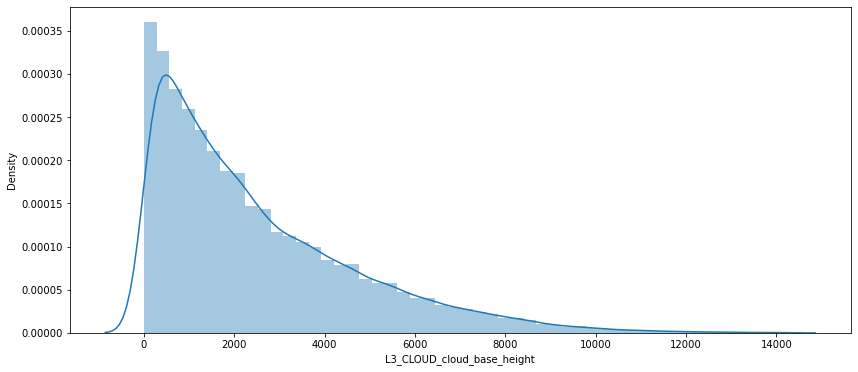

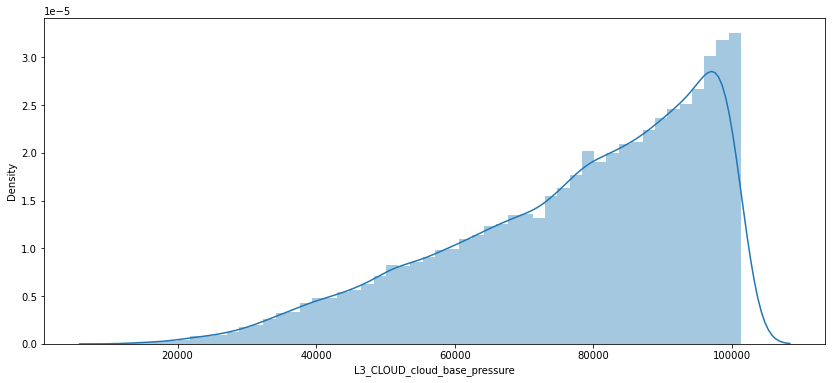

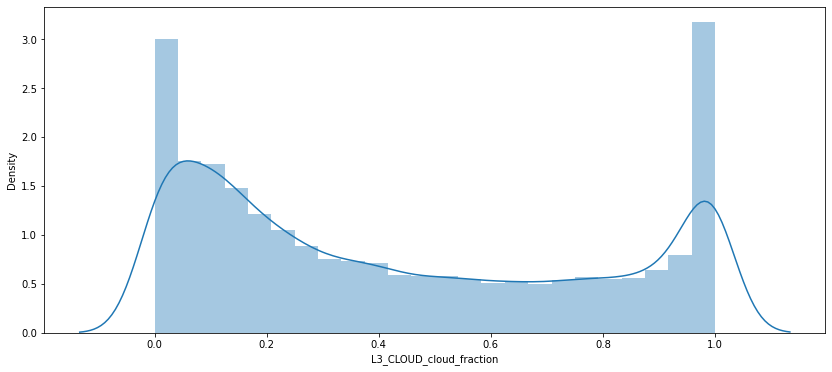

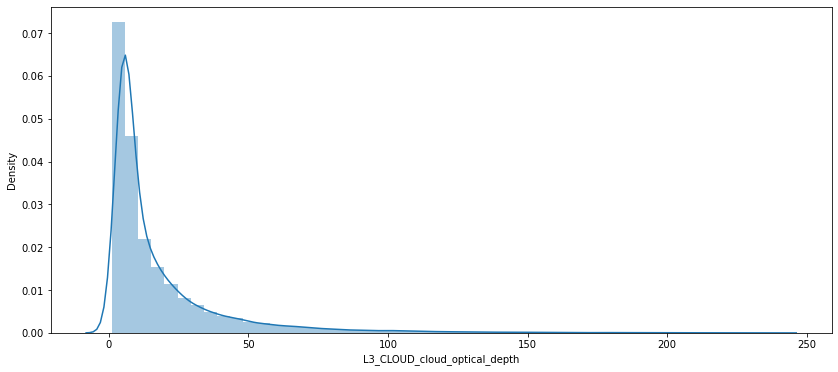

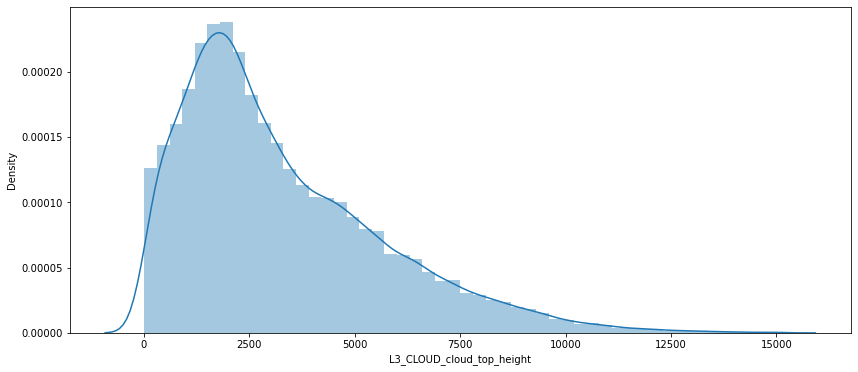

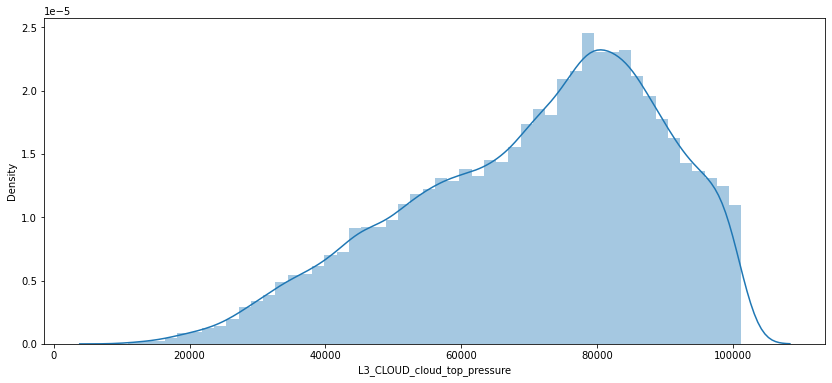

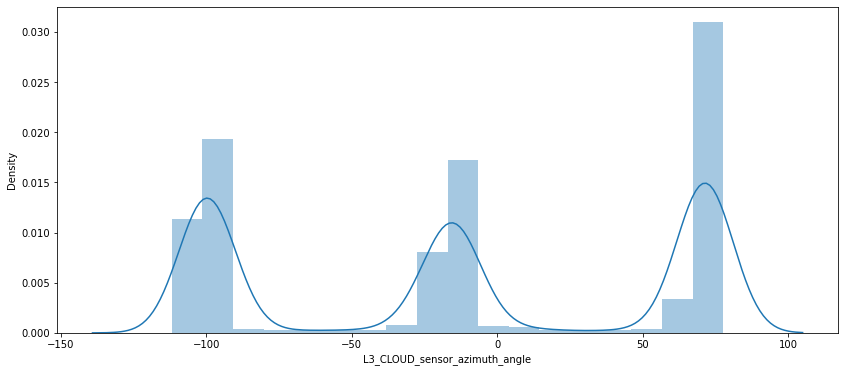

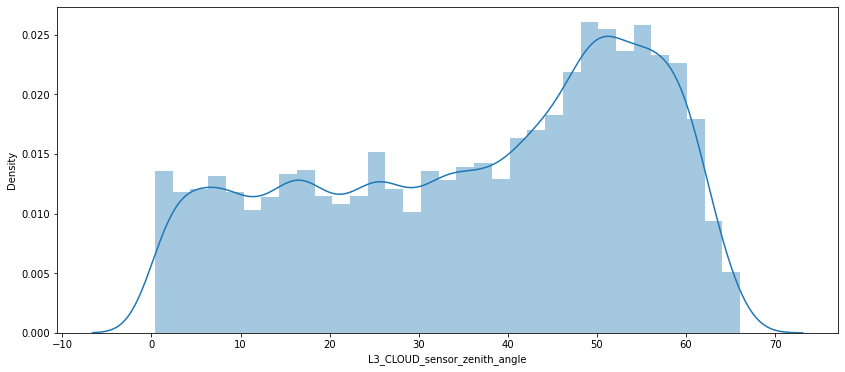

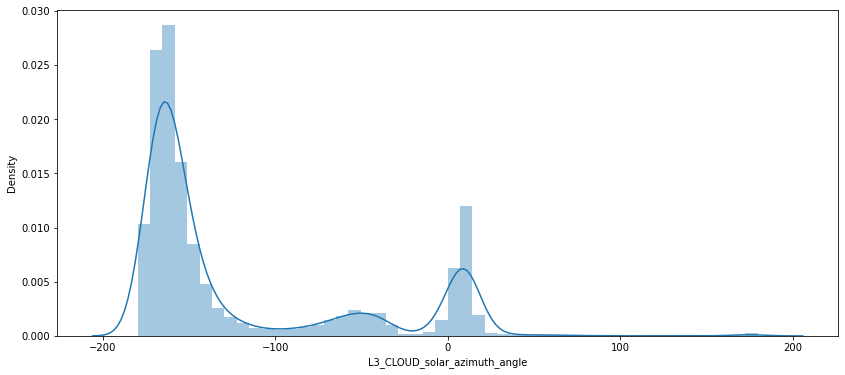

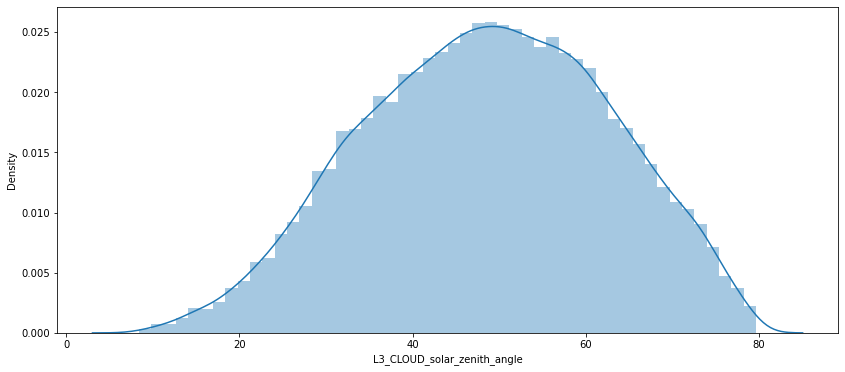

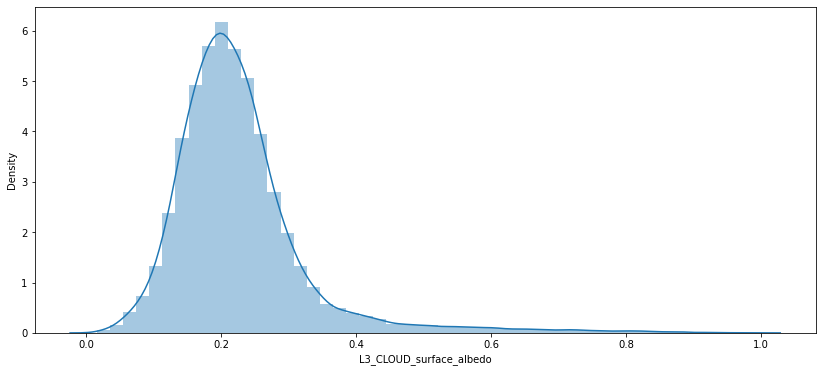

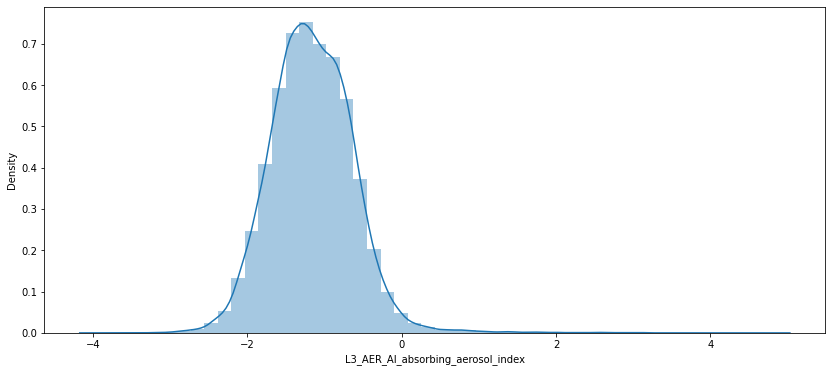

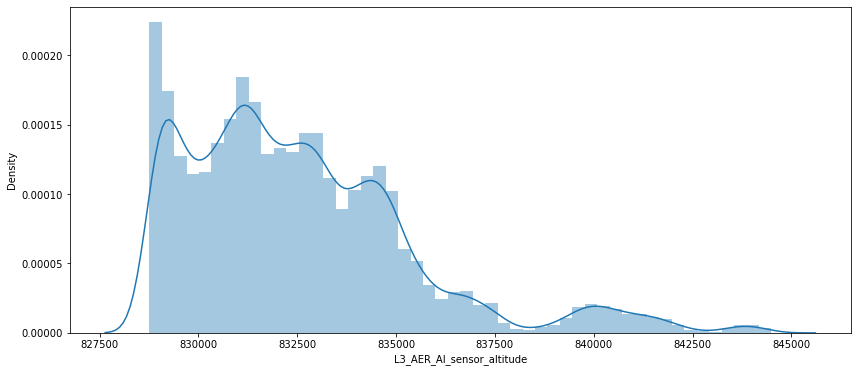

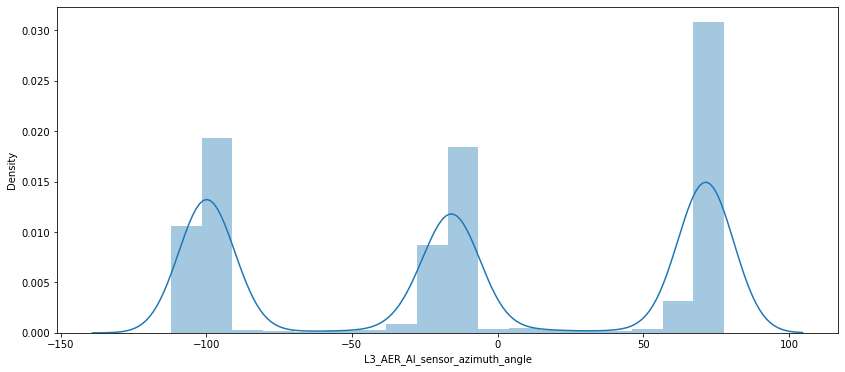

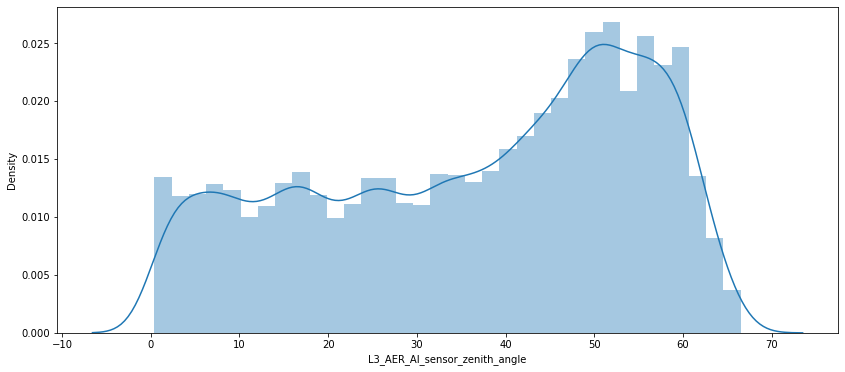

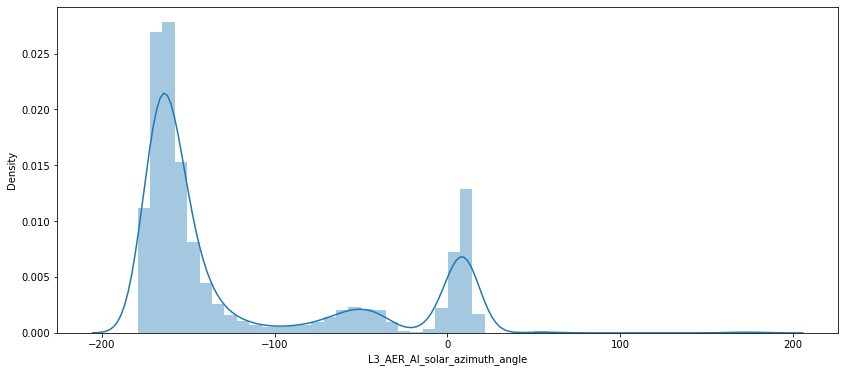

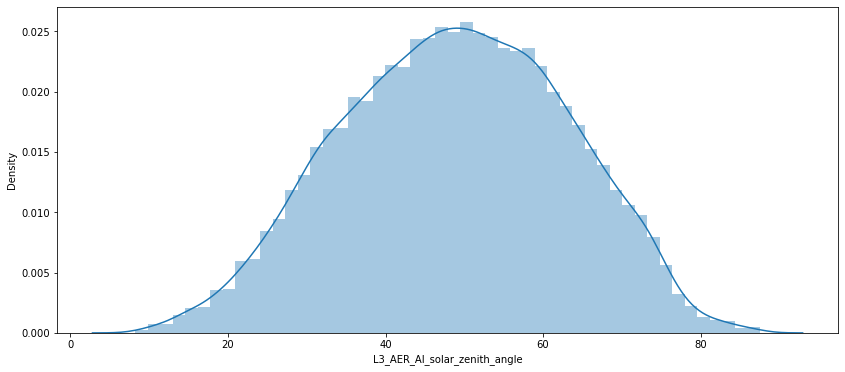

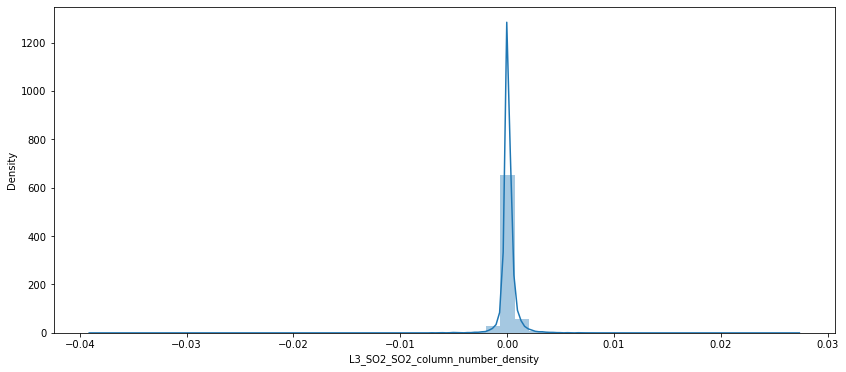

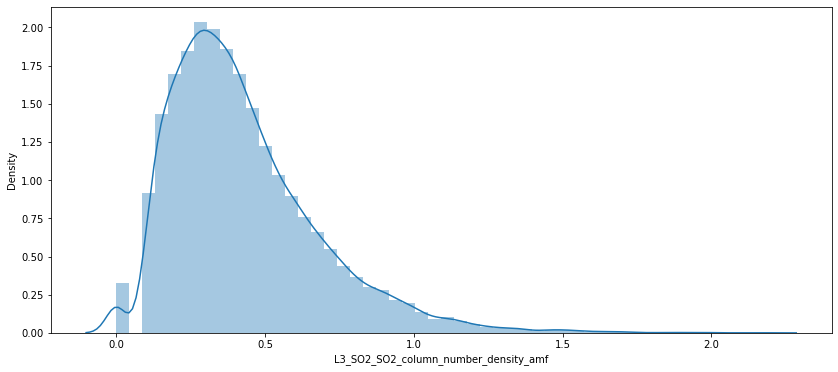

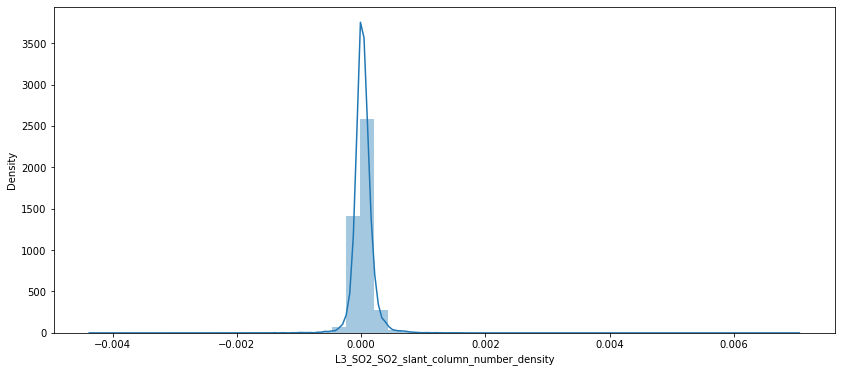

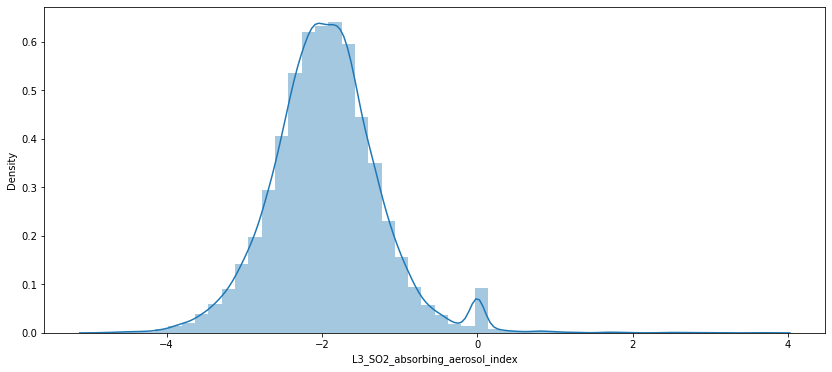

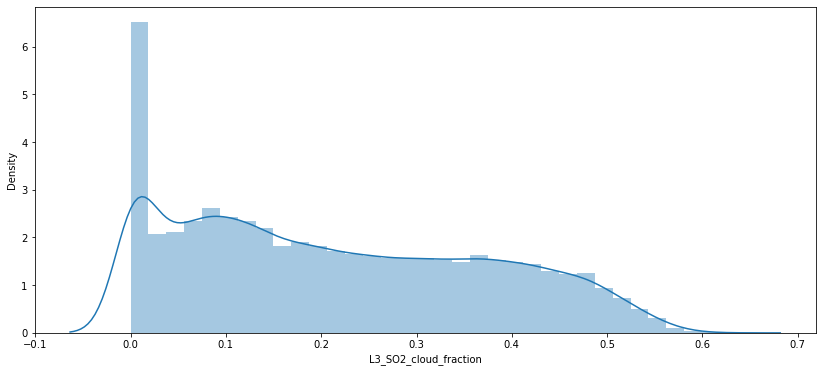

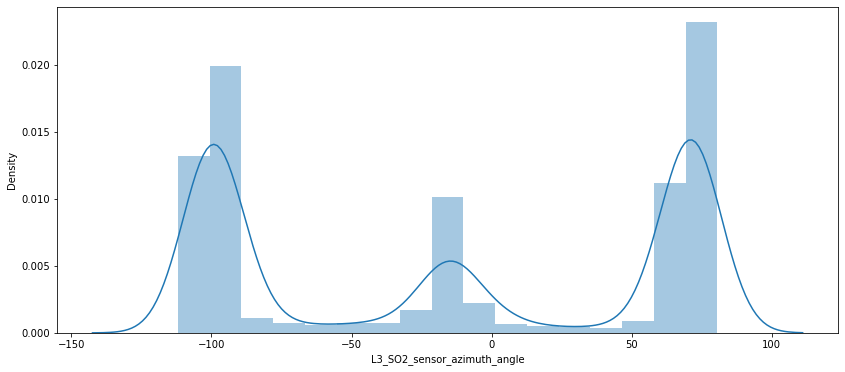

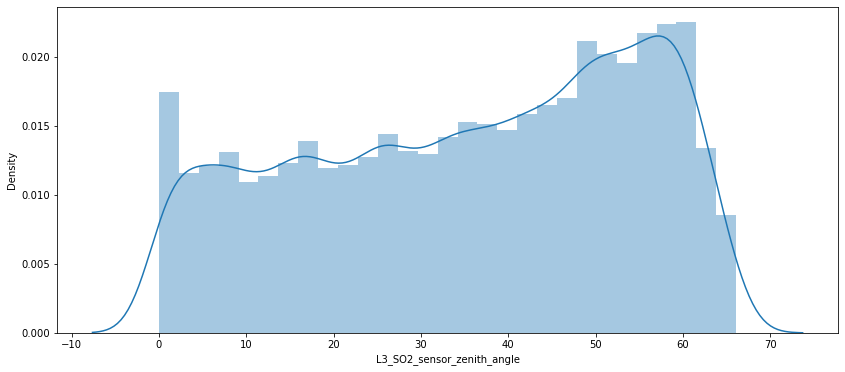

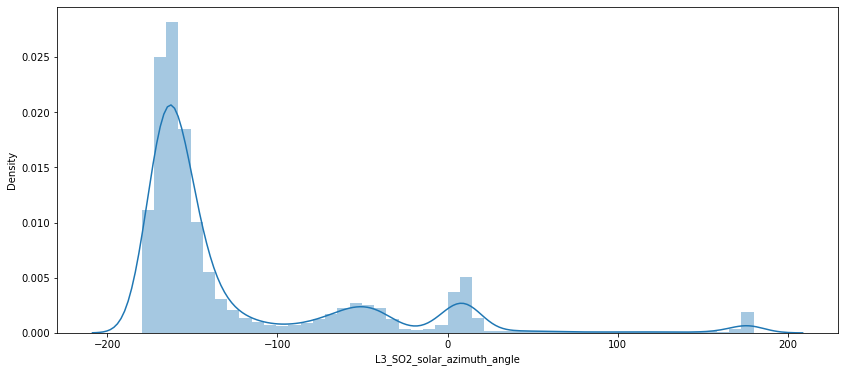

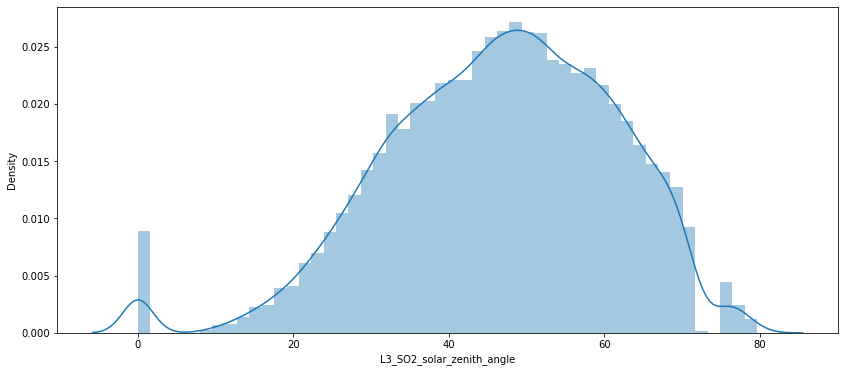

In [40]:
#histogrammes de toutes les variables pour analyser leur comportement
#observation de variables continues standardiséeset asymétriques
for col in df.select_dtypes('float'):
    plt.figure(figsize=(14,6))
    sns.distplot(df[col])

### 4- Rélation entre variables cible et les autres variable

<ipython-input-42-a499f1139df6>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(14,6))


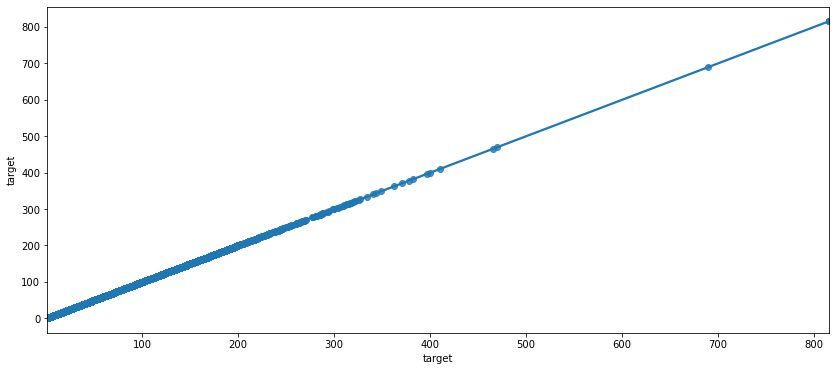

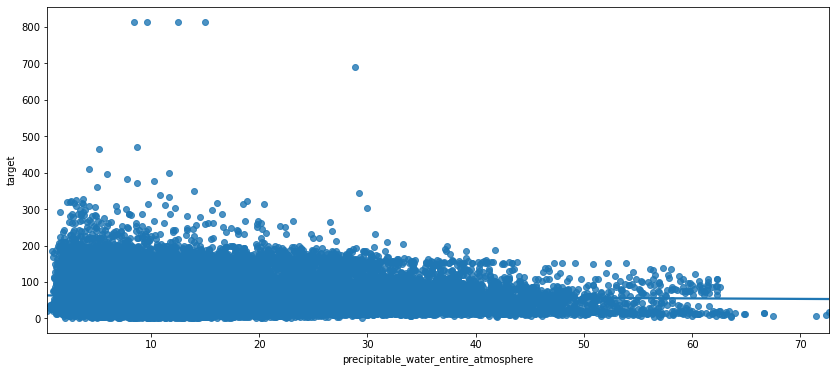

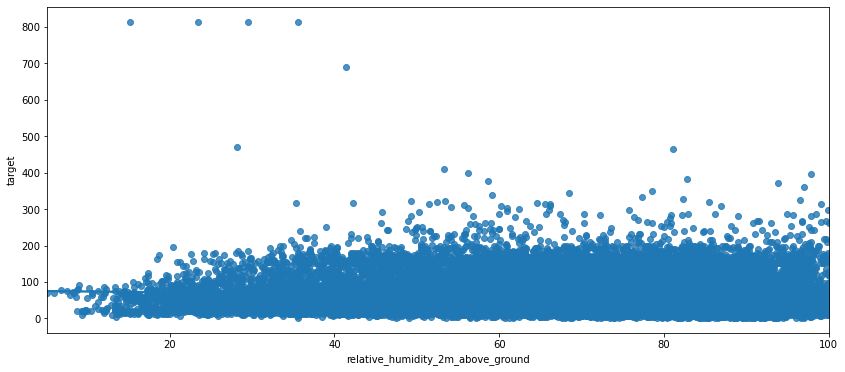

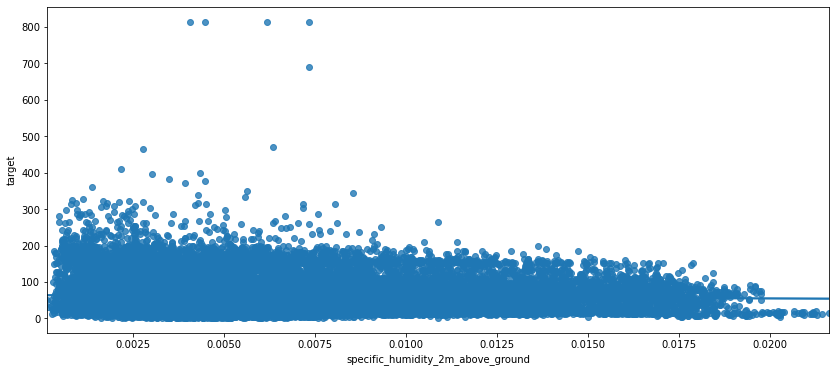

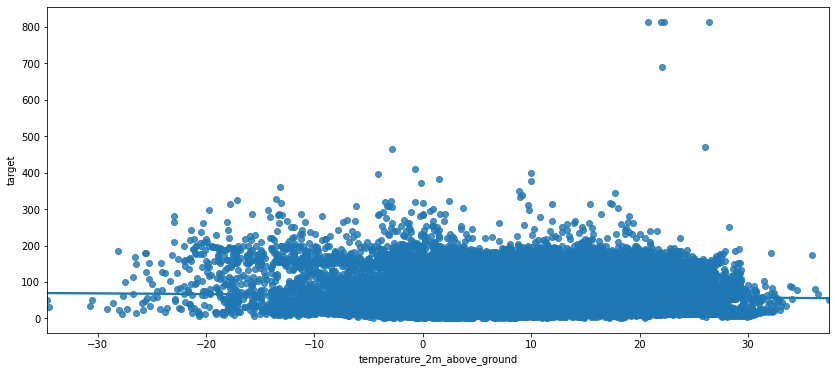

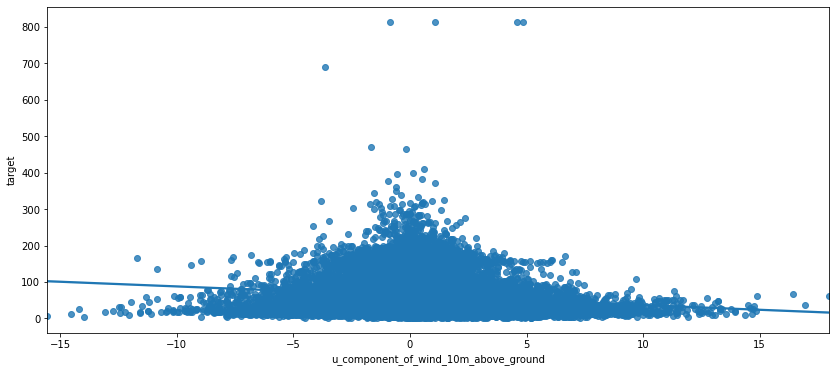

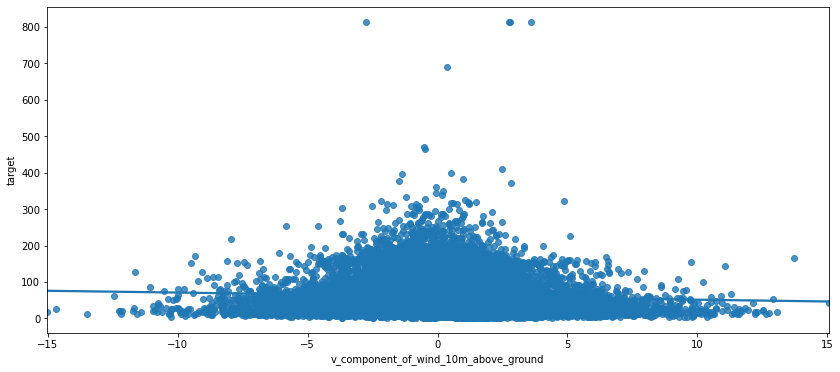

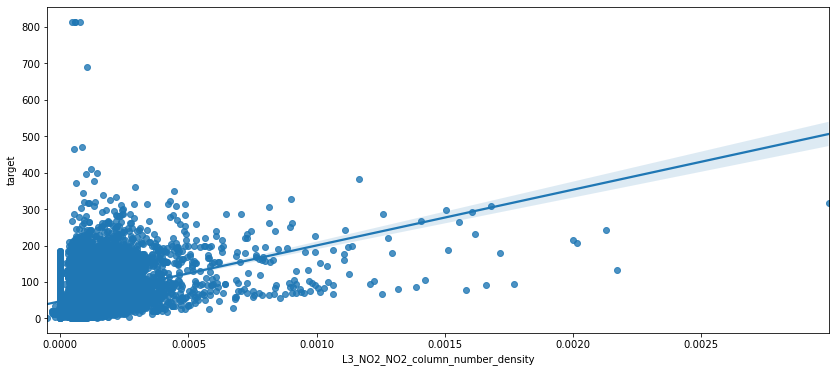

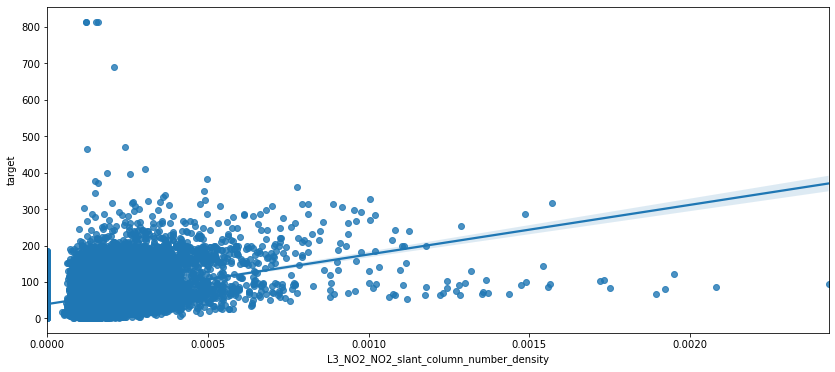

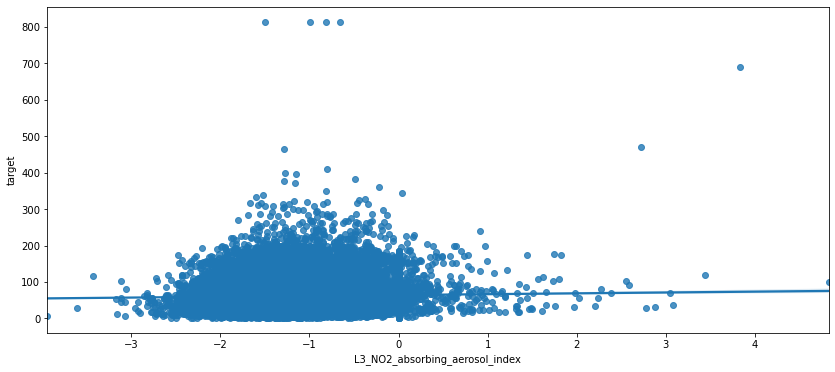

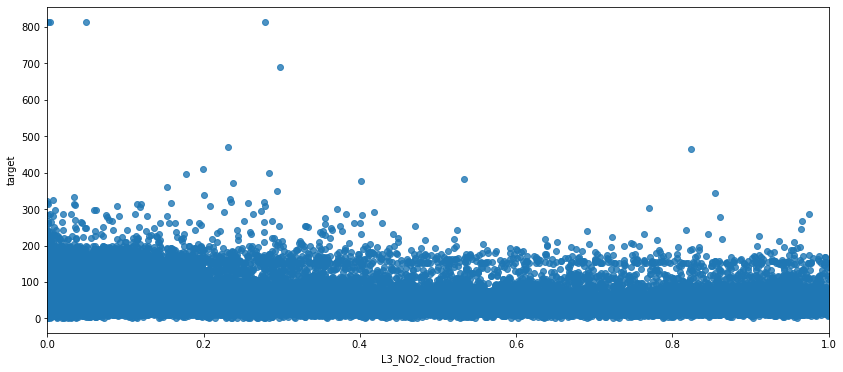

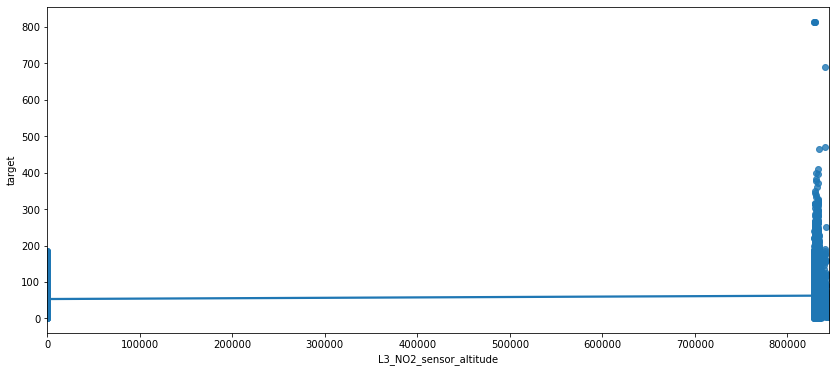

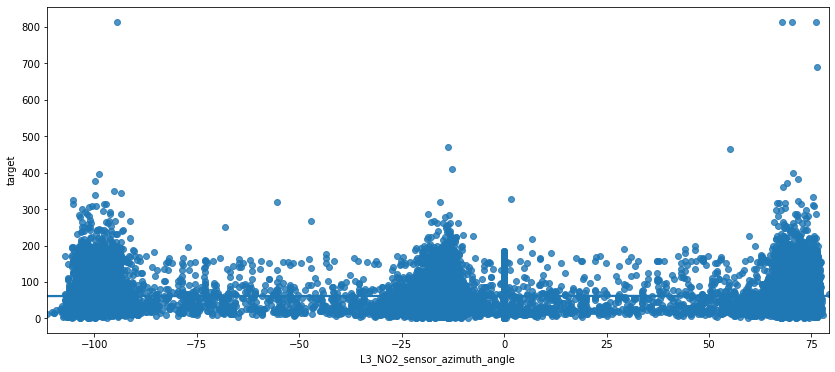

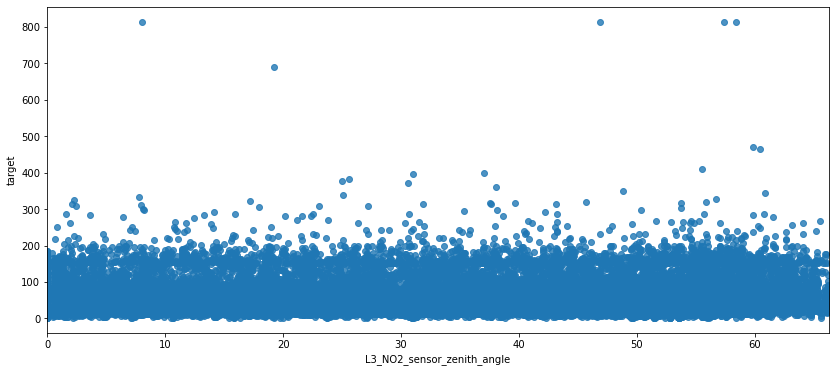

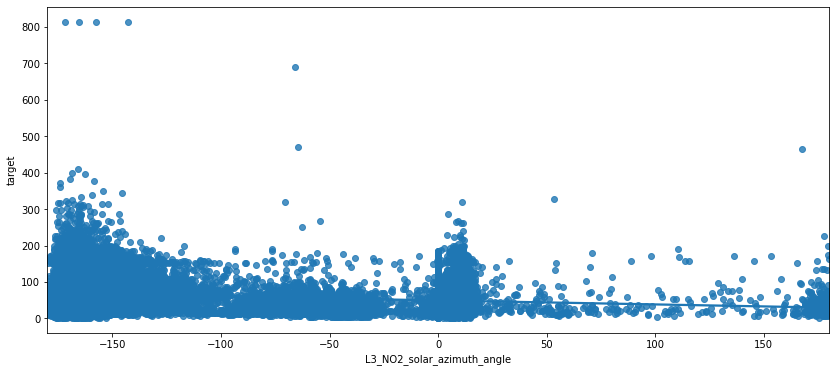

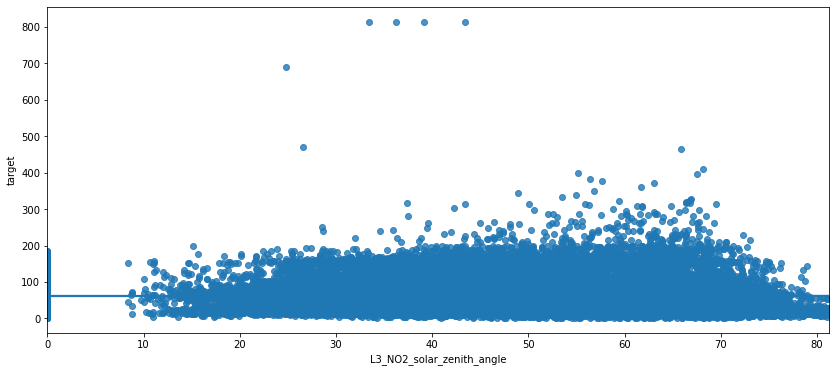

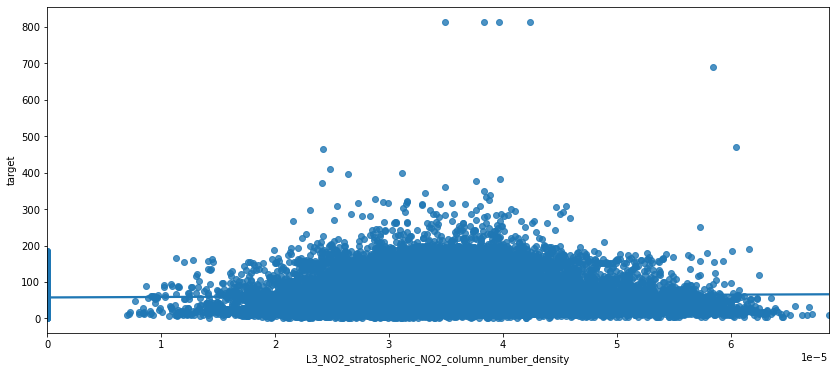

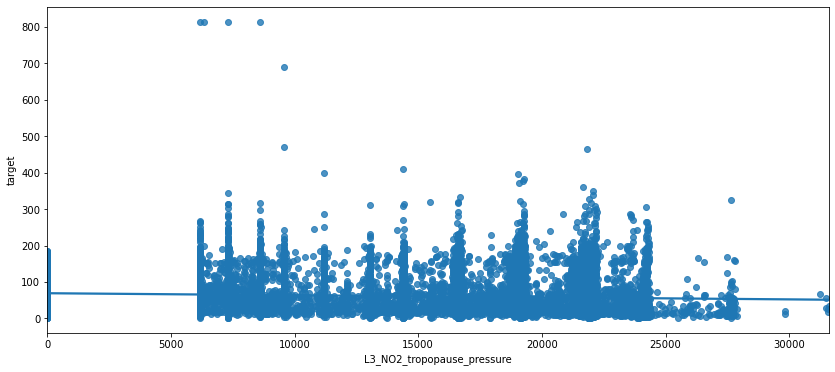

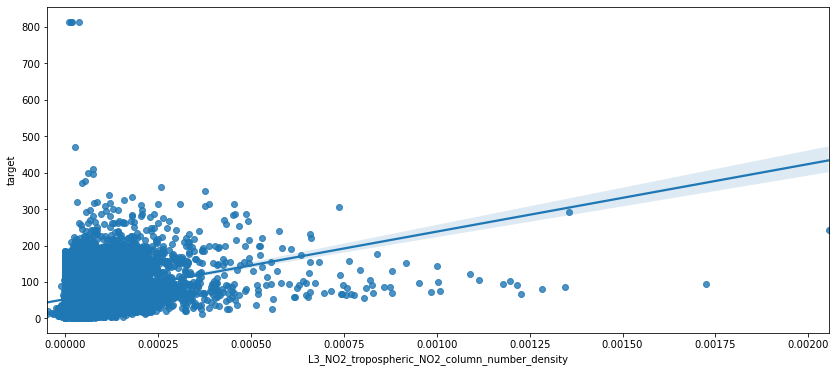

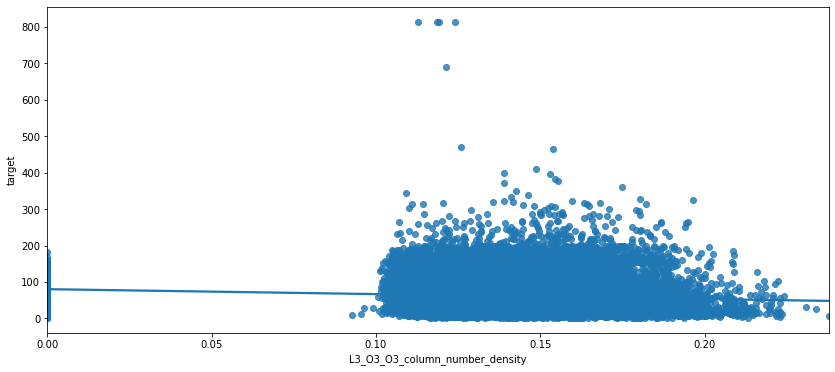

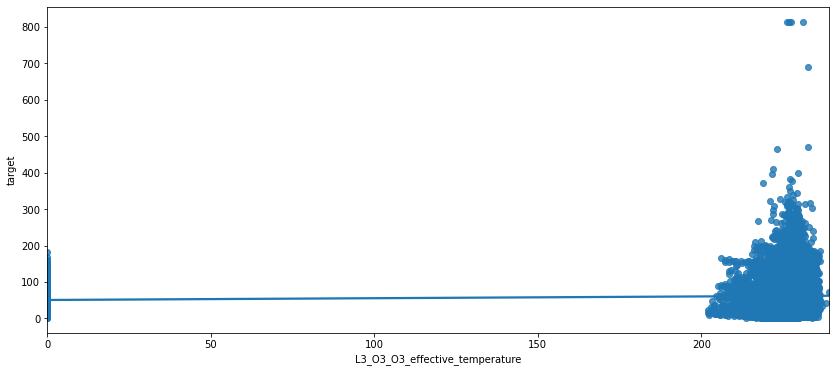

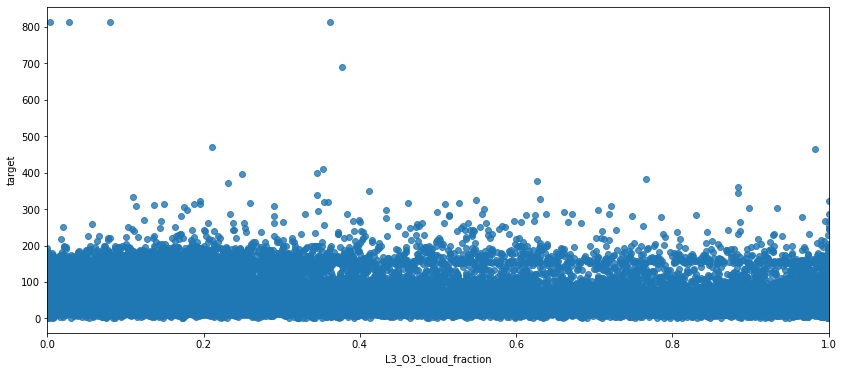

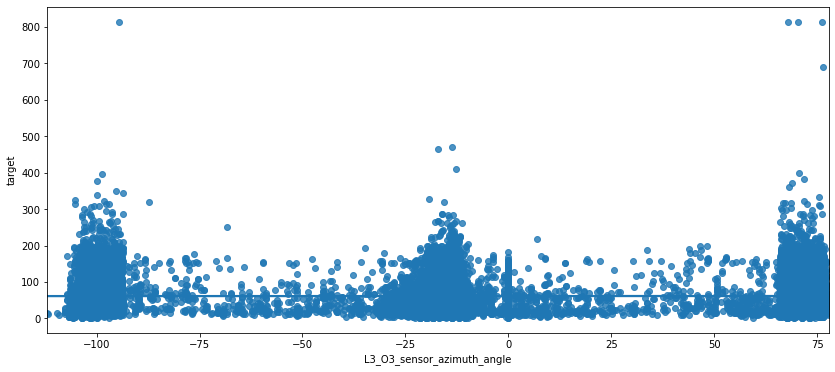

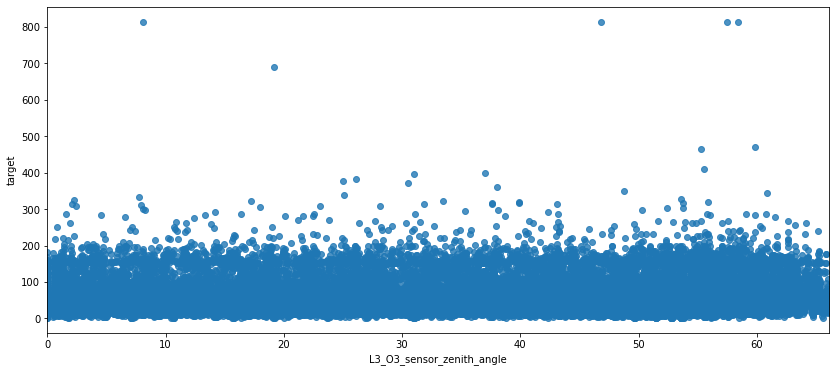

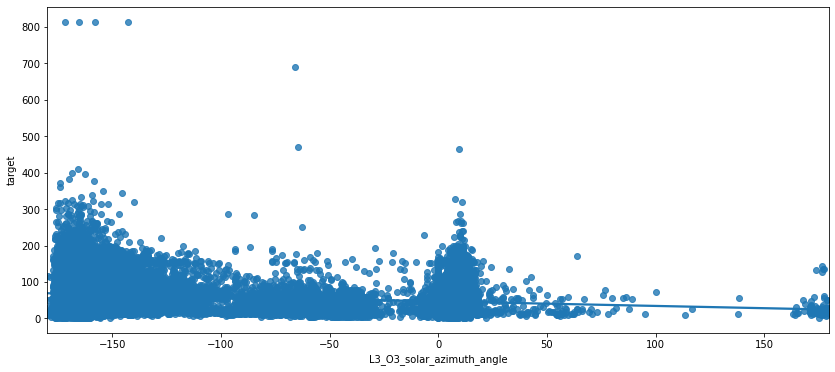

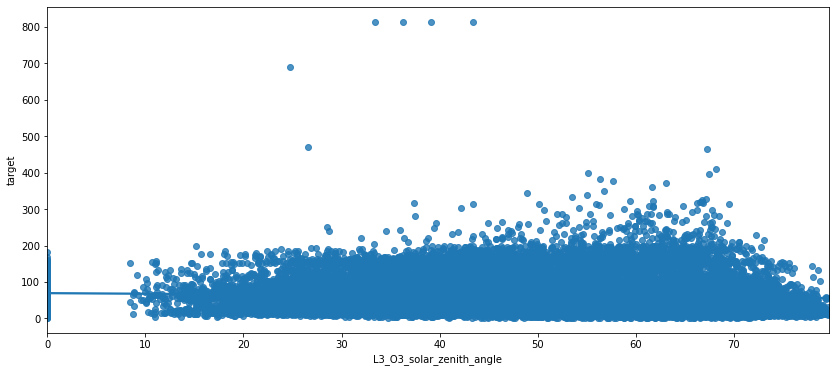

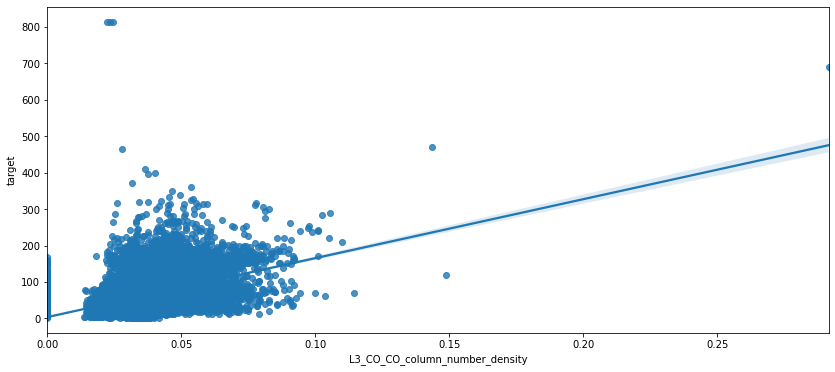

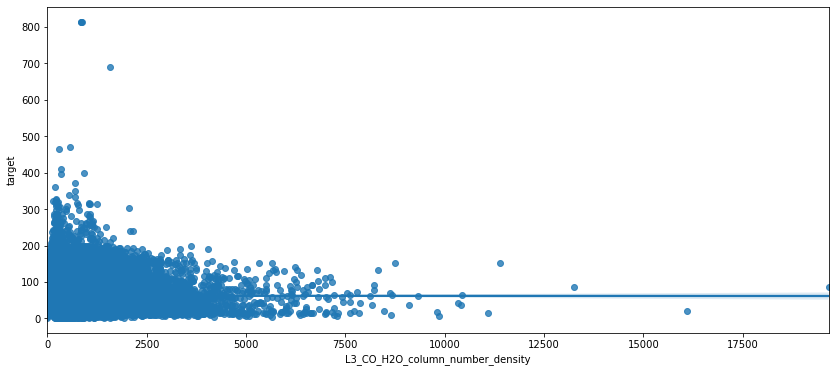

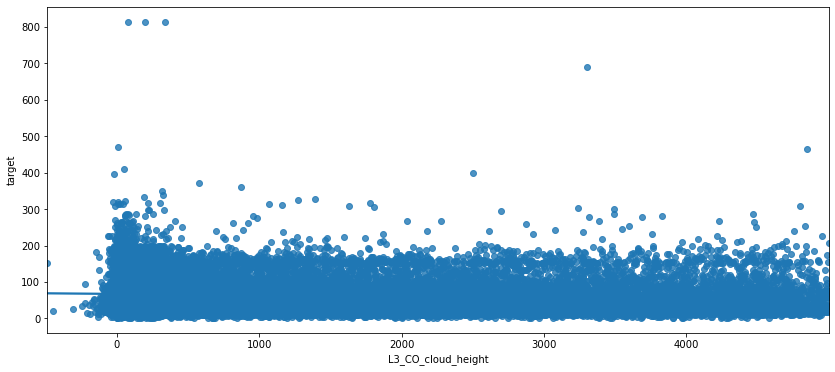

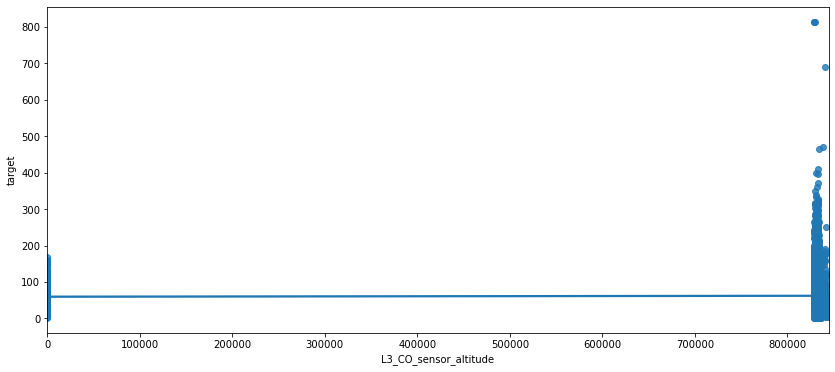

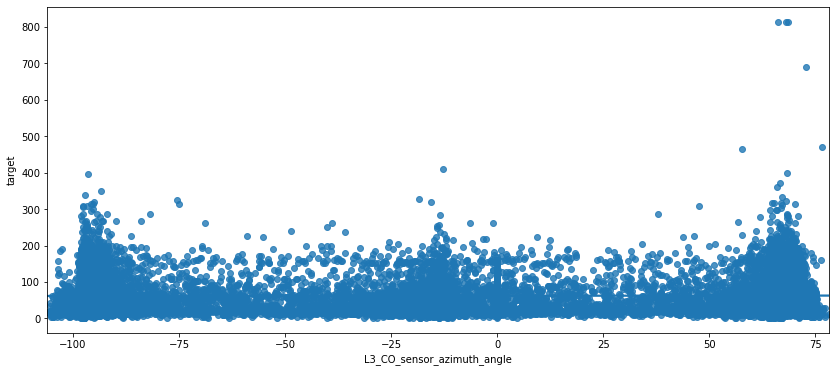

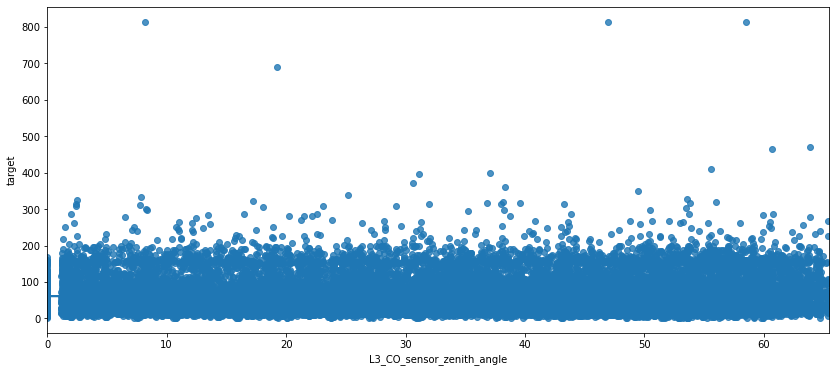

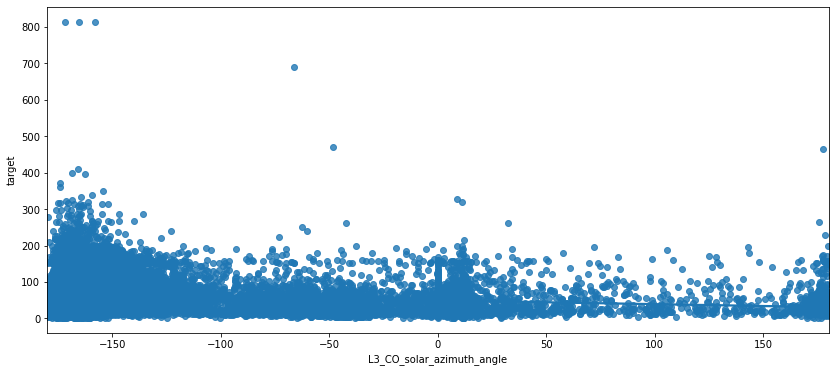

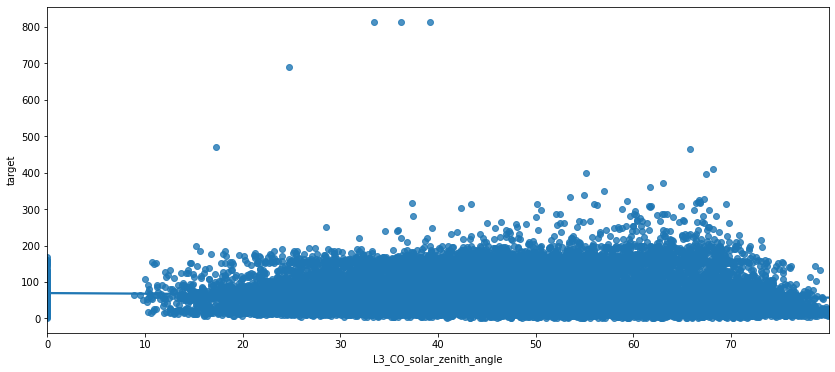

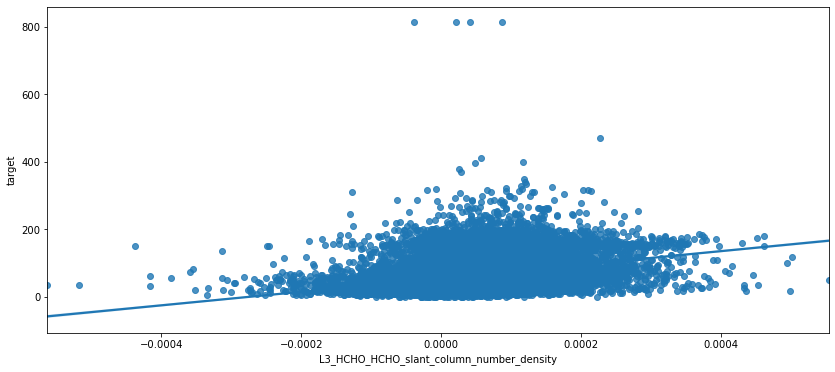

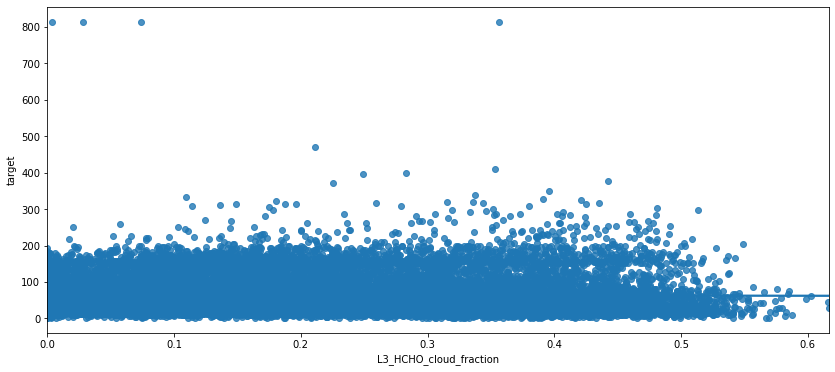

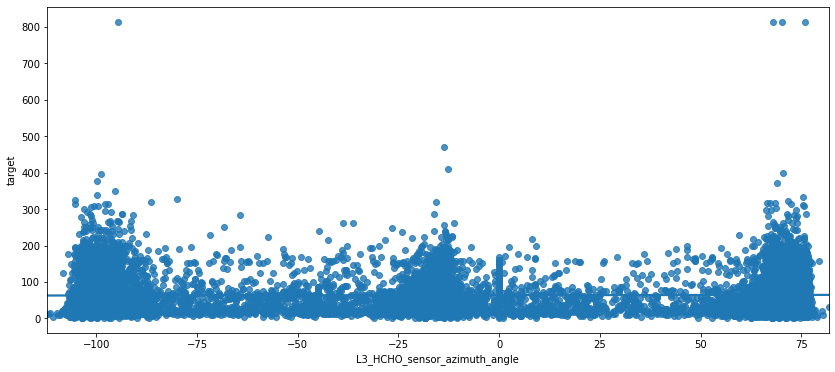

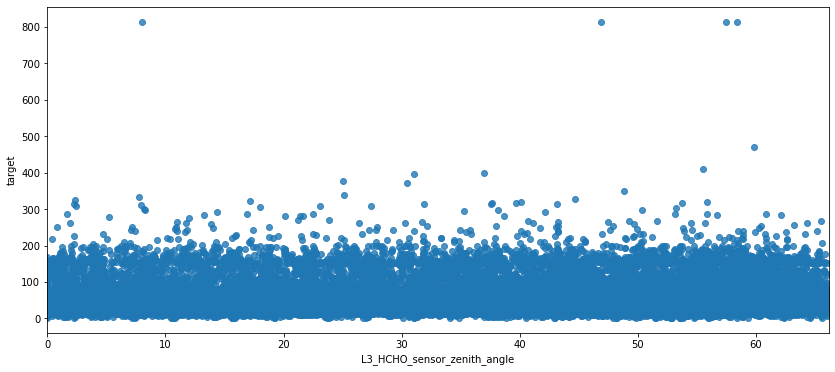

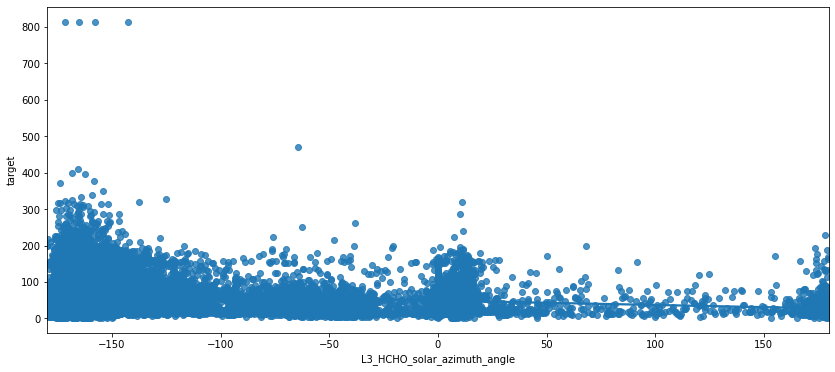

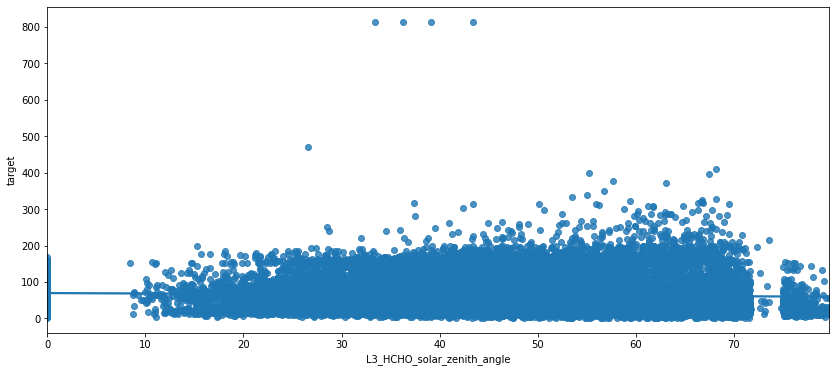

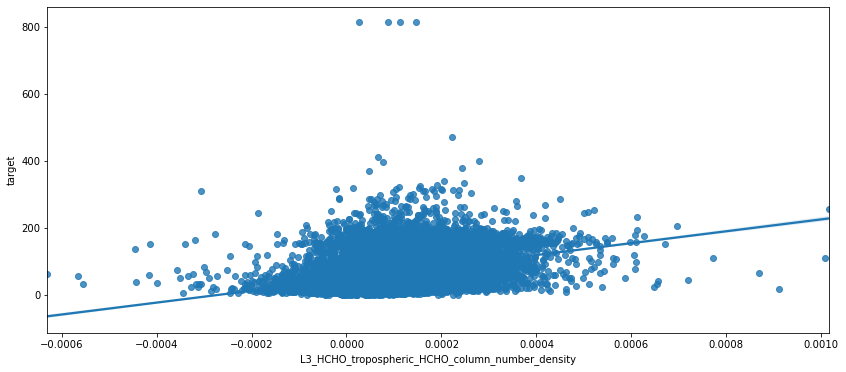

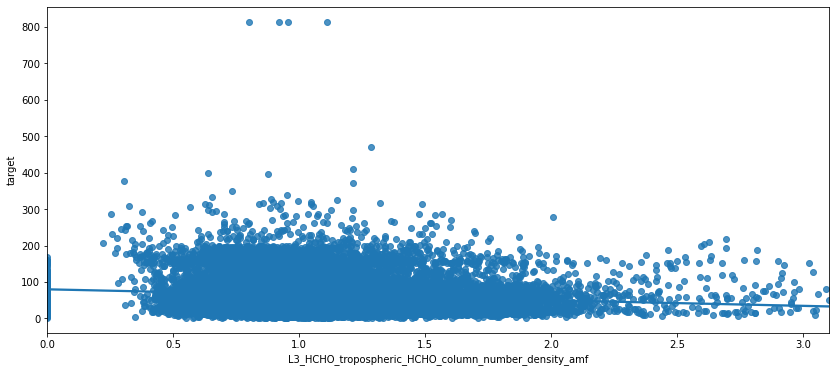

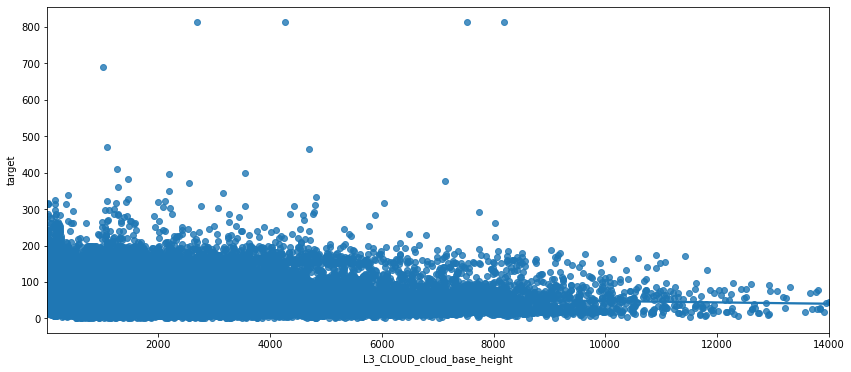

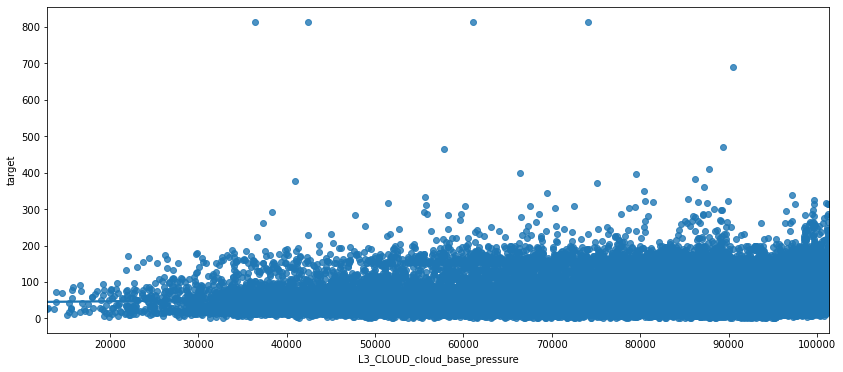

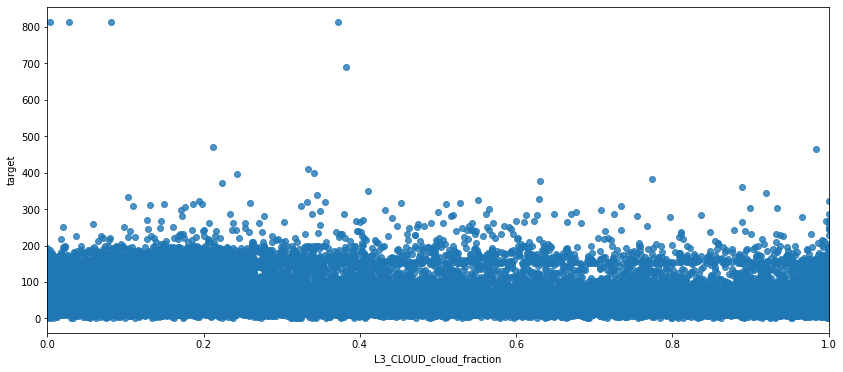

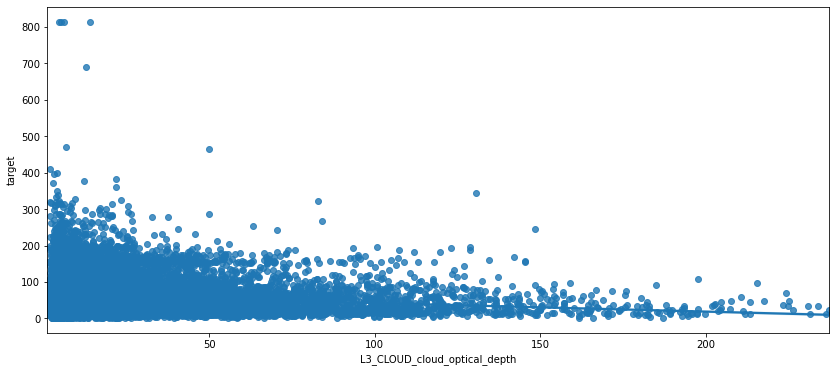

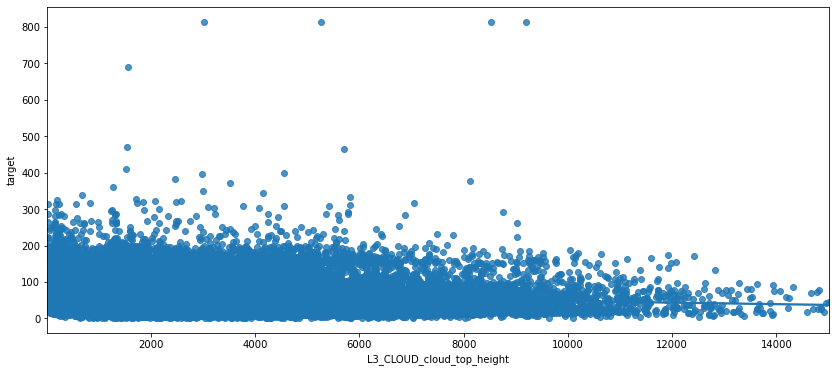

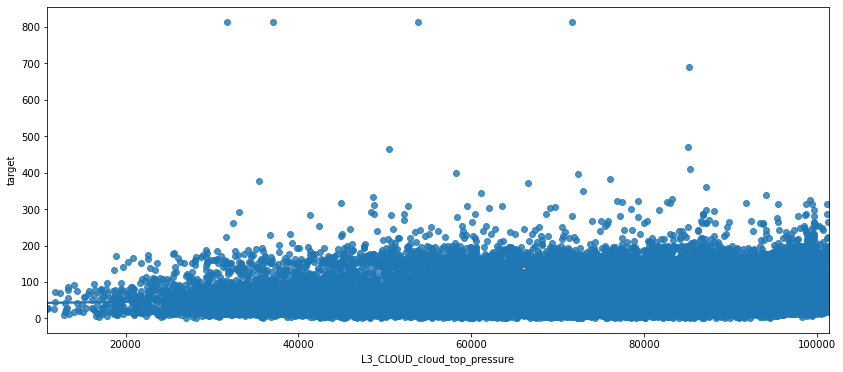

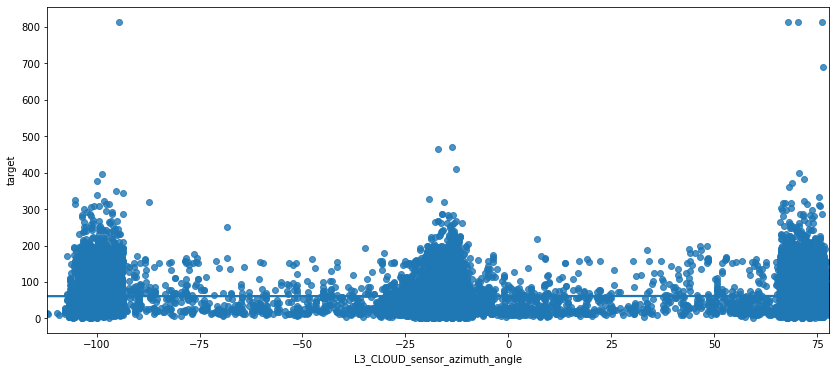

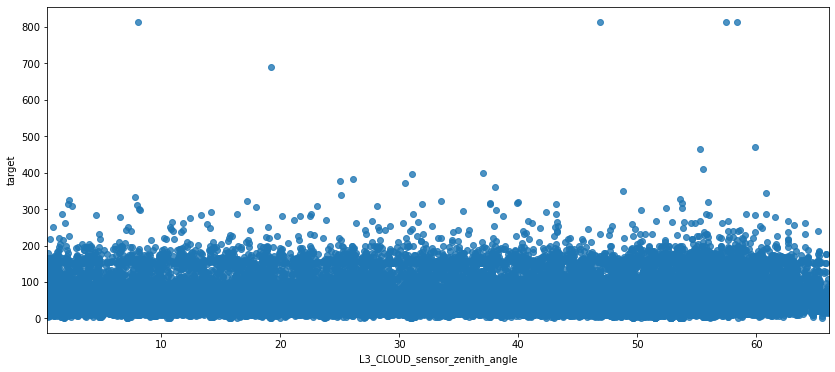

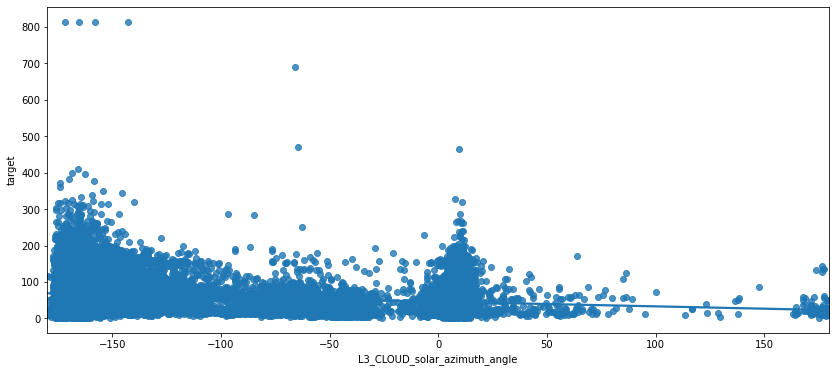

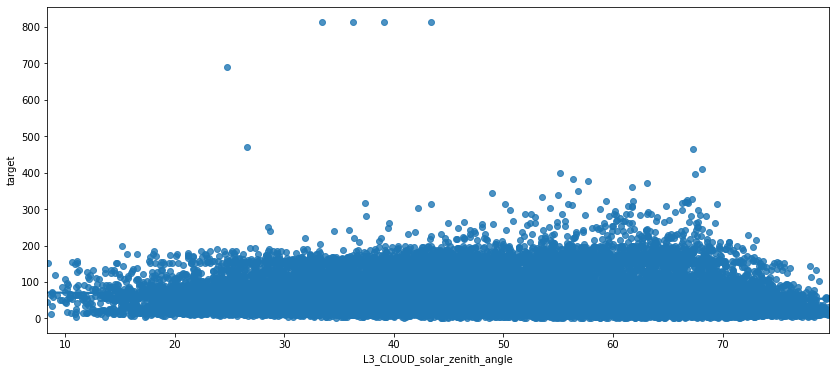

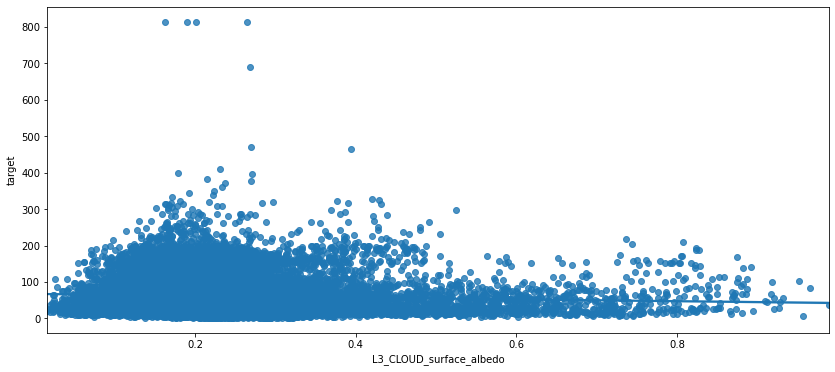

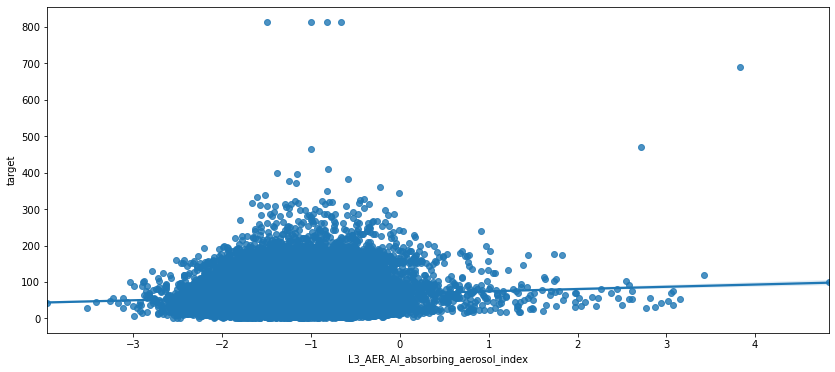

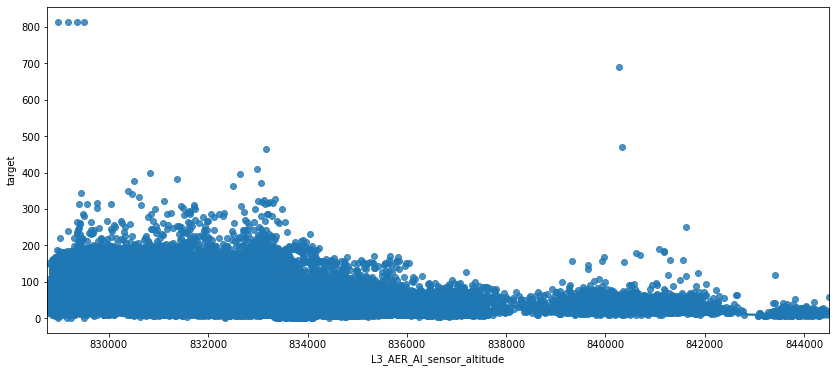

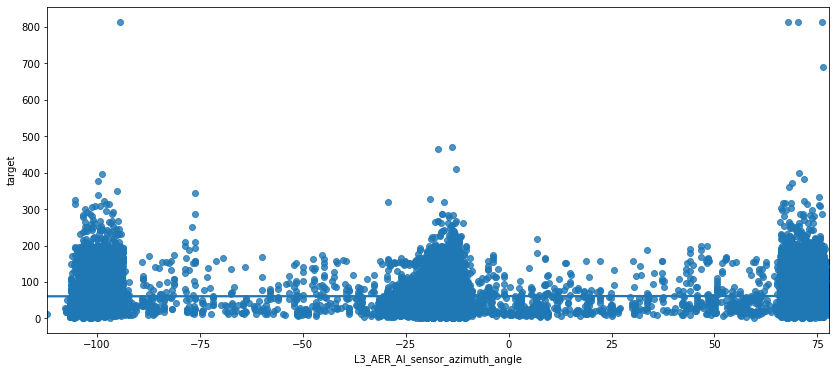

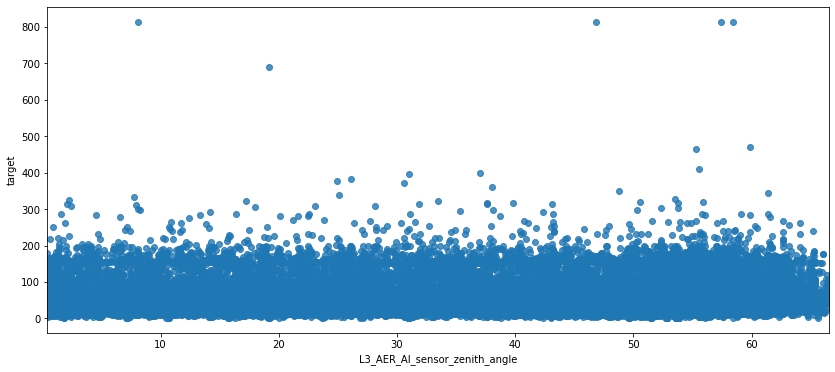

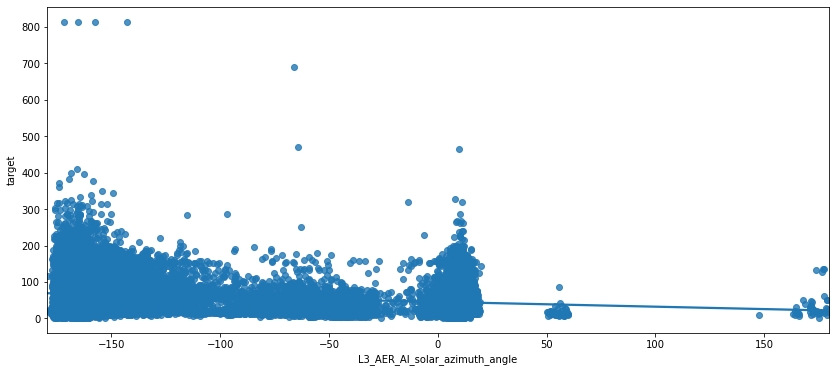

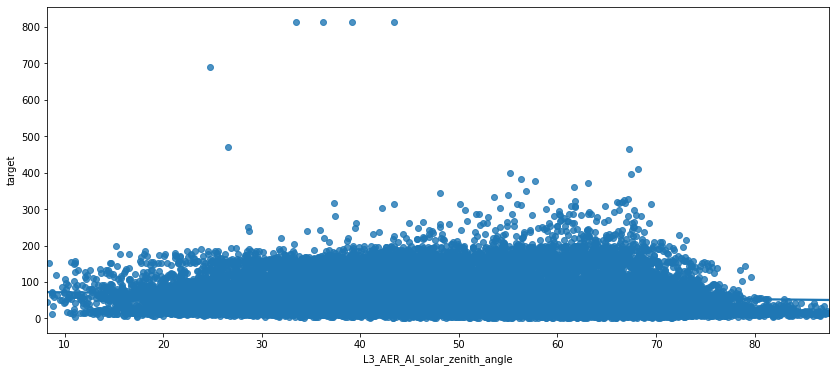

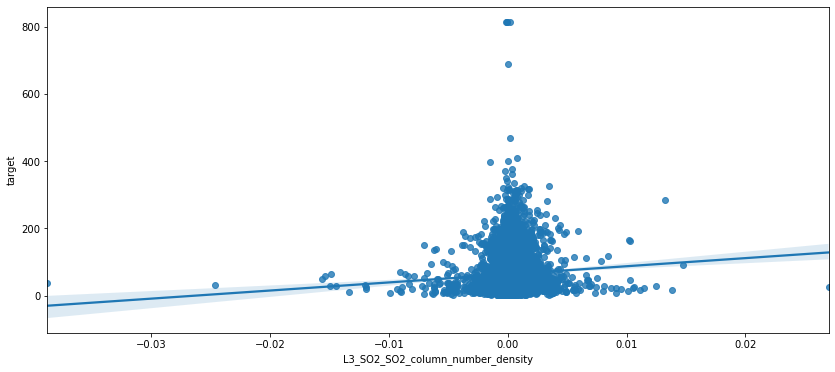

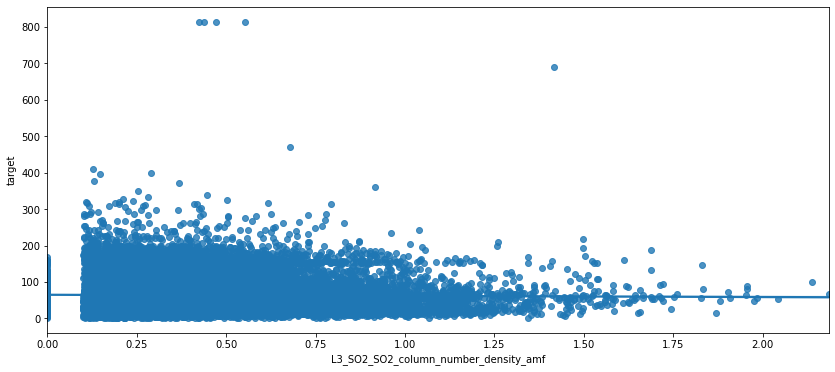

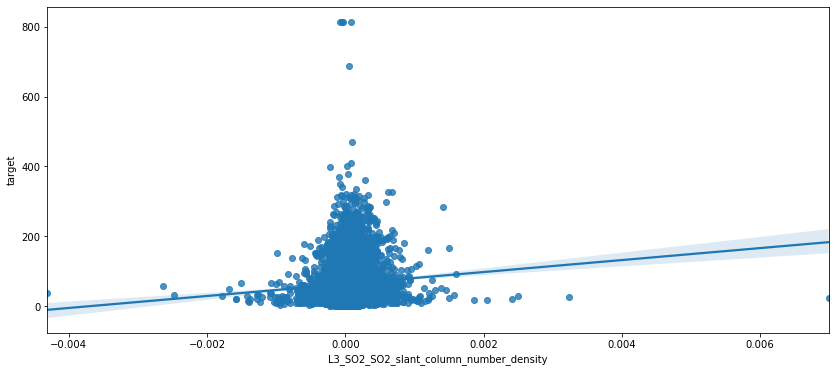

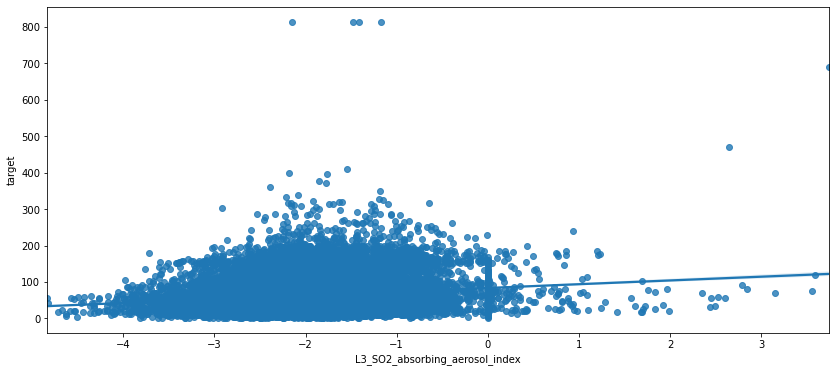

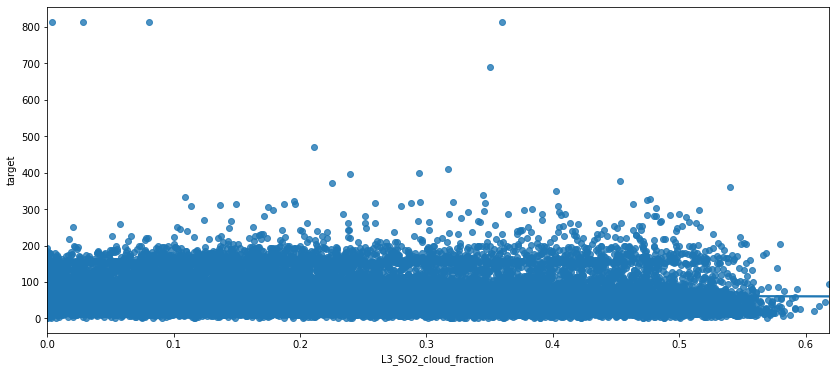

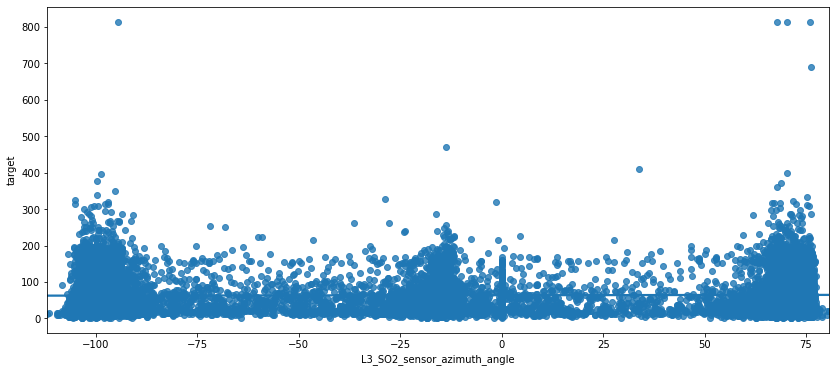

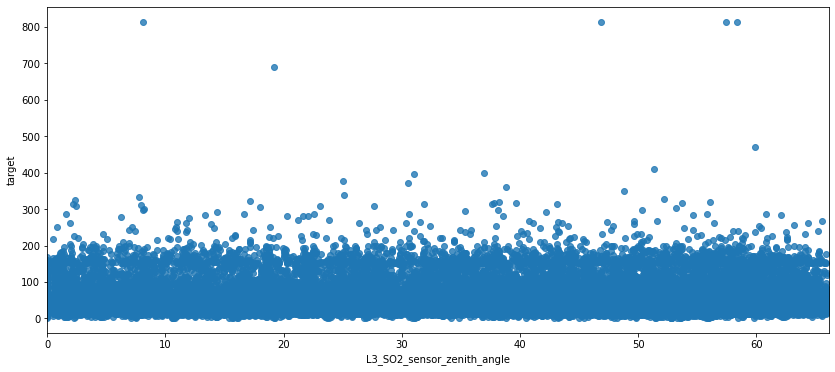

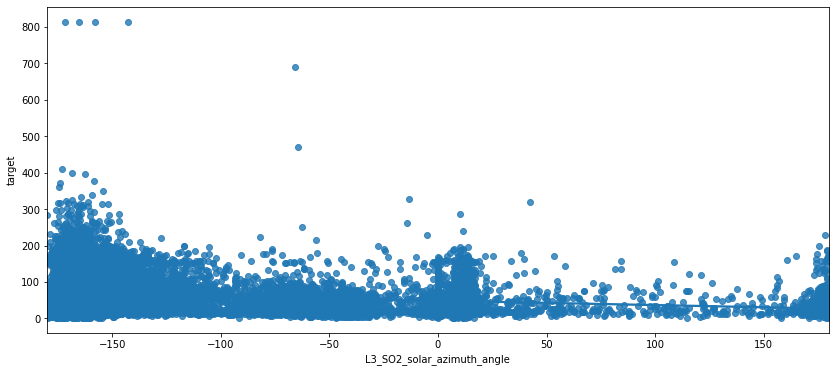

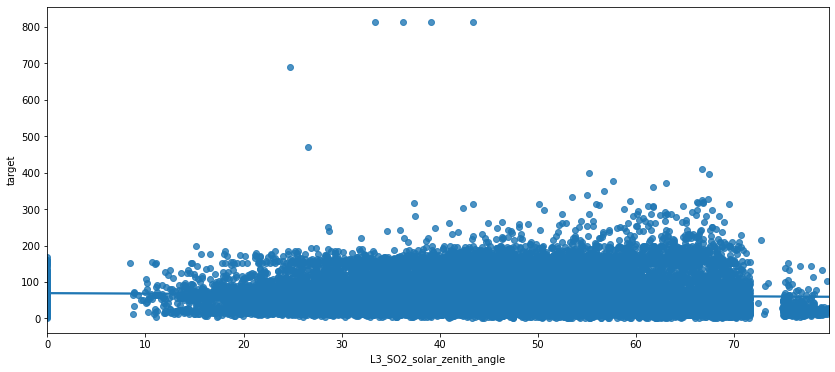

In [42]:
for col in df.columns:
    plt.figure(figsize=(14,6))
    sns.regplot(x=df[col], y=df['target'])

In [7]:
#variables les plus fortement correlées à la cible d'aprés les nuages de points
best_cor = ['u_component_of_wind_10m_above_ground','L3_NO2_NO2_column_number_density', 'L3_NO2_NO2_slant_column_number_density', 
        'L3_NO2_tropospheric_NO2_column_number_density', 'L3_CO_CO_column_number_density', 'L3_HCHO_HCHO_slant_column_number_density',
        'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_CLOUD_cloud_optical_depth', 'L3_AER_AI_absorbing_aerosol_index',
        'L3_SO2_SO2_column_number_density', 'L3_SO2_SO2_slant_column_number_density', 'L3_SO2_absorbing_aerosol_index']

# création de modèles de Machine Learning 

## 1- Séparation apprentissage/validation

In [8]:
X = df[best_cor]
y = df['target']
print(X)
print(y)

       u_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                                  1.996377                          0.000074   
1                                  3.330430                          0.000076   
2                                  5.065727                          0.000067   
3                                  3.004001                          0.000083   
4                                  2.621787                          0.000070   
...                                     ...                               ...   
30552                             -4.810586                          0.000063   
30553                             -2.346421                          0.000072   
30554                              0.095703                          0.000068   
30555                              0.434940                          0.000086   
30556                             -0.710093                          0.000079   

       L3_NO2_NO2_slant_col

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.7, random_state=0)

In [10]:
y_valid

1763     79.0
18763    25.0
11815    68.0
21422    13.0
24864    21.0
         ... 
27491    12.0
7871     59.0
11339    59.0
15407    25.0
3198     23.0
Name: target, Length: 9168, dtype: float64

In [77]:
#my_imputer = SimpleImputer()
#imputed_train_x = pd.DataFrame(my_imputer.fit_transform(X_train))
#imputed_valid_x = pd.DataFrame(my_imputer.transform(X_valid))

In [78]:
#imputed_valid_x

0         1         2         3         4         5         6   \
0    -0.395798  0.000069  0.000155  0.000017  0.037362  0.000090  0.000187   
1     4.642540  0.000138  0.000271  0.000067  0.034636 -0.000141 -0.000122   
2     0.029646  0.000121  0.000229  0.000075  0.046718  0.000071  0.000109   
3    -0.025999  0.000043  0.000112  0.000018  0.031995  0.000029  0.000043   
4    -0.626314  0.000069  0.000143  0.000009  0.027518  0.000059  0.000124   
...        ...       ...       ...       ...       ...       ...       ...   
9163  1.226081  0.000063  0.000124  0.000002  0.018962 -0.000053  0.000026   
9164  0.067396  0.000228  0.000203  0.000056  0.044962 -0.000033 -0.000017   
9165 -2.845006  0.000110  0.000150  0.000056  0.036241  0.000044  0.000089   
9166 -0.344880  0.000104  0.000117  0.000056  0.049714  0.000044  0.000089   
9167  0.461338  0.000081  0.000158  0.000046  0.036241  0.000043  0.000146   

             7         8         9         10        11  
0      4.247342 -1.117579  0.000046  0.000021 -1.328943  
1      7.960462 -0.874147 -0.001705 -0.000207 -1.315856  
2      5.874835 -1.262626  0.000062  0.000057 -1.744313  
3     26.402197 -2.003788  0.000995  0.000283 -3.119201  
4      4.650694 -1.073600  0.000257  0.000070 -1.687224  
...         ...       ...       ...       ...       ...  
9163  17.609684 -1.239807  0.000233  0.000183 -3.557156  
9164   7.834858 -0.654310 -0.000925 -0.000242 -1.678107  
9165  47.330350 -0.289309  0.000116  0.000033 -1.941235  
9166  12.690480 -1.193573  0.000116  0.000033 -1.941235  
9167   9.793446 -0.742344 -0.000110 -0.000034 -1.131909  

[9168 rows x 12 columns]

In [79]:
#imputed_train_x.columns = X_train.columns
#imputed_valid_x.columns = X_valid.columns

In [80]:
#imputed_valid_x

u_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                                -0.395798                          0.000069   
1                                 4.642540                          0.000138   
2                                 0.029646                          0.000121   
3                                -0.025999                          0.000043   
4                                -0.626314                          0.000069   
...                                    ...                               ...   
9163                              1.226081                          0.000063   
9164                              0.067396                          0.000228   
9165                             -2.845006                          0.000110   
9166                             -0.344880                          0.000104   
9167                              0.461338                          0.000081   

      L3_NO2_NO2_slant_column_number_density  \
0                                   0.000155   
1                                   0.000271   
2                                   0.000229   
3                                   0.000112   
4                                   0.000143   
...                                      ...   
9163                                0.000124   
9164                                0.000203   
9165                                0.000150   
9166                                0.000117   
9167                                0.000158   

      L3_NO2_tropospheric_NO2_column_number_density  \
0                                          0.000017   
1                                          0.000067   
2                                          0.000075   
3                                          0.000018   
4                                          0.000009   
...                                             ...   
9163                                       0.000002   
9164                                       0.000056   
9165                                       0.000056   
9166                                       0.000056   
9167                                       0.000046   

      L3_CO_CO_column_number_density  \
0                           0.037362   
1                           0.034636   
2                           0.046718   
3                           0.031995   
4                           0.027518   
...                              ...   
9163                        0.018962   
9164                        0.044962   
9165                        0.036241   
9166                        0.049714   
9167                        0.036241   

      L3_HCHO_HCHO_slant_column_number_density  \
0                                     0.000090   
1                                    -0.000141   
2                                     0.000071   
3                                     0.000029   
4                                     0.000059   
...                                        ...   
9163                                 -0.000053   
9164                                 -0.000033   
9165                                  0.000044   
9166                                  0.000044   
9167                                  0.000043   

      L3_HCHO_tropospheric_HCHO_column_number_density  \
0                                            0.000187   
1                                           -0.000122   
2                                            0.000109   
3                                            0.000043   
4                                            0.000124   
...                                               ...   
9163                                         0.000026   
9164                                        -0.000017   
9165                                         0.000089   
9166                                         0.000089   
9167                                         0.000146   

      L3_CLOUD_cloud_optical_depth  L3_A

## 2- Imputation, standardisation et transformation

### Imputation des valeurs manquantes et standardisation

In [11]:
#inputation et standardisation
#from sklearn.pipeline import make_pipeline

#num_transformer = make_pipeline(SimpleImputer(strategy ='median'))

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy ='median')),
    ('scaler', StandardScaler())])
   

In [12]:
#preprocessing automatique
preprocessor = ColumnTransformer(
    transformers=[
    ('num_transformer', num_transformer, best_cor)     
])

In [13]:
#initialisation d'un modèle de regression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
linear_regressor = LinearRegression()
random_forest = RandomForestRegressor(n_estimators = 1000, random_state=0)
xgboost = XGBRegressor()
dict_model = {'linear_regressor': linear_regressor, 'random_forest' : random_forest, 'xgbosst': xgboost}

In [14]:
dict_model.items()

dict_items([('linear_regressor', LinearRegression()), ('random_forest', RandomForestRegressor(n_estimators=1000, random_state=0)), ('xgbosst', XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None))])

In [18]:
#modele basic pour une prémière prédiction
from sklearn.metrics import mean_absolute_error
for name, model in dict_model.items():
    clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_valid)
    print(name, 'mean_absolue:' , mean_absolute_error(y_predict, y_valid), 'score :', clf.score(X_valid, y_valid))
   

linear_regressor mean_absolue: 29.55234781810587 score : 0.25584242074568975
random_forest mean_absolue: 26.069663691514997 score : 0.37383078313960105
xgbosst mean_absolue: 26.353633779748286 score : 0.36326442184862917


In [19]:
#entrainement du modèle
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', random_forest)
])

In [20]:
clf.score(X_valid, y_valid)

0.37383078313960105

In [21]:
prediction = clf.predict(test_data_set)

C:\Users\Patrick Menan\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [22]:
output = pd.DataFrame({'Place_ID X Date': test_data_set['Place_ID X Date'], 'target' : prediction  })

In [24]:
output.to_csv('subimission_v0.csv', index = False)

# Amélioration du modèle  